# 선형대수와 해석기하의 기초

## 벡터의 기하학적 의미

$N$차원 벡터(vector) $a$는 $N$차원의 공간상에서 

* 벡터 $a$의 값으로 표시되는 **점(point)** 또는
* 원점과 벡터 $a$의 값으로 표시되는 점을 연결한 **화살표(arrow)**

라고 생각할 수 있다. 

예를 들어 2차원 벡터 $a = [a_1 \;\; a_2]^T$는 2차원 상의 공간에서 $x$ 좌표가 $a_1$, $y$ 좌표가 $a_2$인 점으로 생각할 수도 있고 또는 원점에서 이 점을 가리키는 화살표로 생각할 수도 있다. 벡터를 화살표로 생각하는 경우에는 길이와 방향을 고정시킨채 **평행이동**할 수 있다. 

(앞으로 나오는 그림은 모두 matplotlib 패키지로 그린 그림이다. 이 코드는 파이썬으로 이러한 그림도 제작할 수 있다는 것을 보이기 위한 것일뿐 본 절의 내용과는 관계없으므로 그림 코드의 내용은 무시해도 된다.) 

In [1]:
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

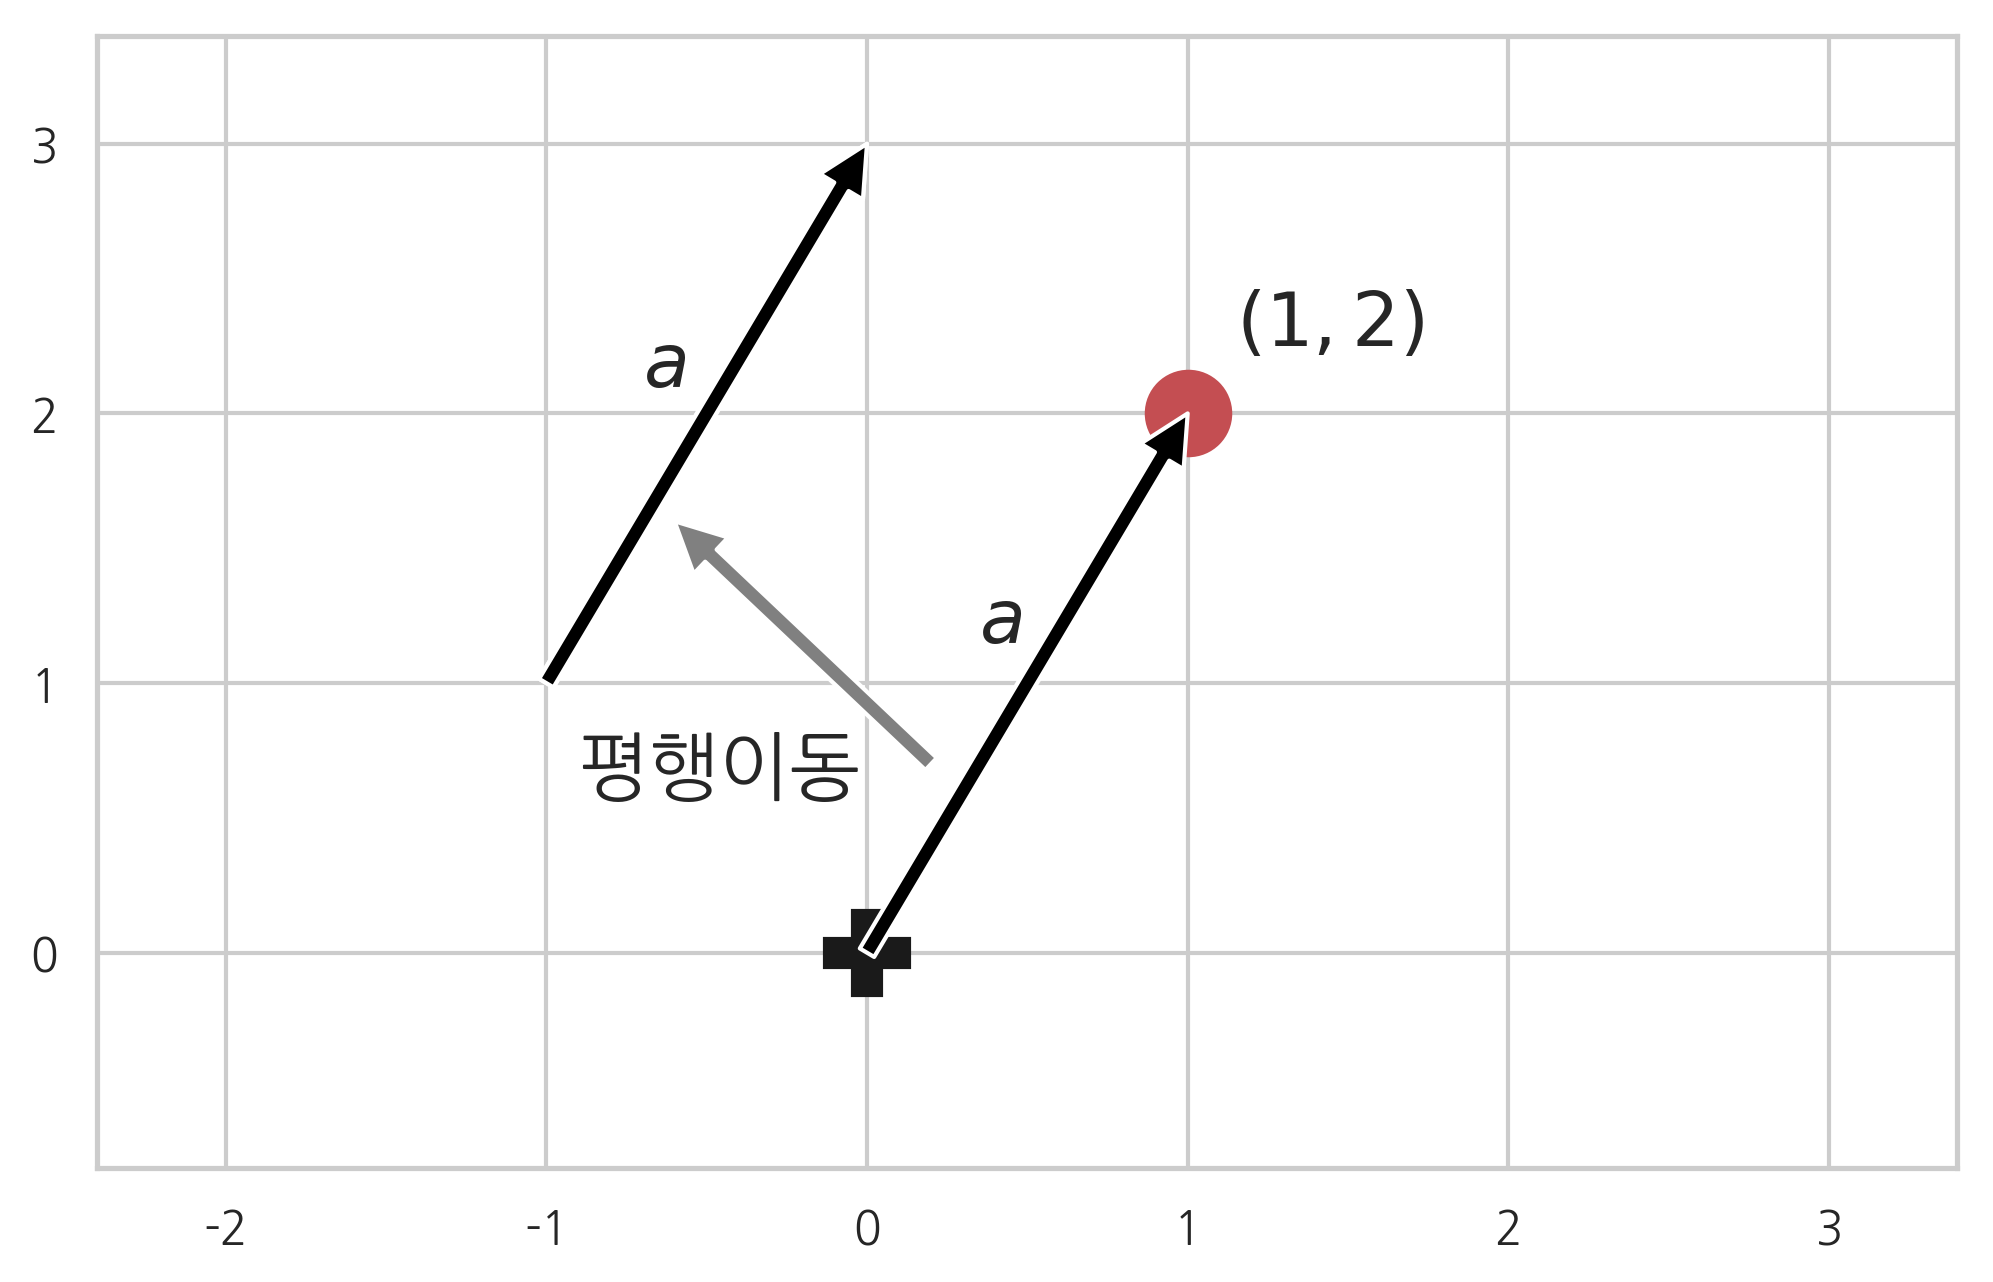

In [2]:
a = np.array([1, 2])
plt.plot(0, 0, 'kP', ms=20)
plt.plot(a[0], a[1], 'ro', ms=20)
plt.annotate('', xy=[-0.6, 1.6], xytext=(0.2, 0.7),
             arrowprops={"facecolor": "gray"})
plt.annotate('', xy=a, xytext=(0, 0), arrowprops={"facecolor": "black"})
plt.annotate('', xy=a + [-1, 1], xytext=(-1, 1),
             arrowprops={"facecolor": "black"})
plt.annotate('', xy=a + [-1, 1], xytext=(-1, 1),
             arrowprops={"facecolor": "black"})
plt.text(0.35, 1.15, "$a$")
plt.text(1.15, 2.25, "$(1,2)$")
plt.text(-0.7, 2.1, "$a$")
plt.text(-0.9, 0.6, "평행이동")
plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(-1, 4))
plt.xlim(-2.4, 3.4)
plt.ylim(-0.8, 3.4)
plt.show()

## 벡터의 길이

벡터 $a$의 길이는 **놈(norm) $\| a \|$**으로 정의한다.

$$ \| a \| = \sqrt{a^T a } = \sqrt{a_1^2 + \cdots + a_N^2}  $$

numpy의 linalg 서브 패키지의 `norm` 명령으로 벡터의 길이를 계산할 수 있다. 위에서 예로 든 2차원 벡터 $a = [a_1 \;\; a_2]^T$의 길이는 $\sqrt{5} \approx 2.236$이다.

In [3]:
a = np.array([1, 2])
np.linalg.norm(a)

2.23606797749979

## 스칼라와 벡터의 곱

양의 실수와 벡터를 곱하면 벡터의 방향은 변하지 않고 실수의 크기만큼 벡터의 길이가 커진다. 만약 음의 실수를 곱하면 벡터의 방향이 반대가 된다.

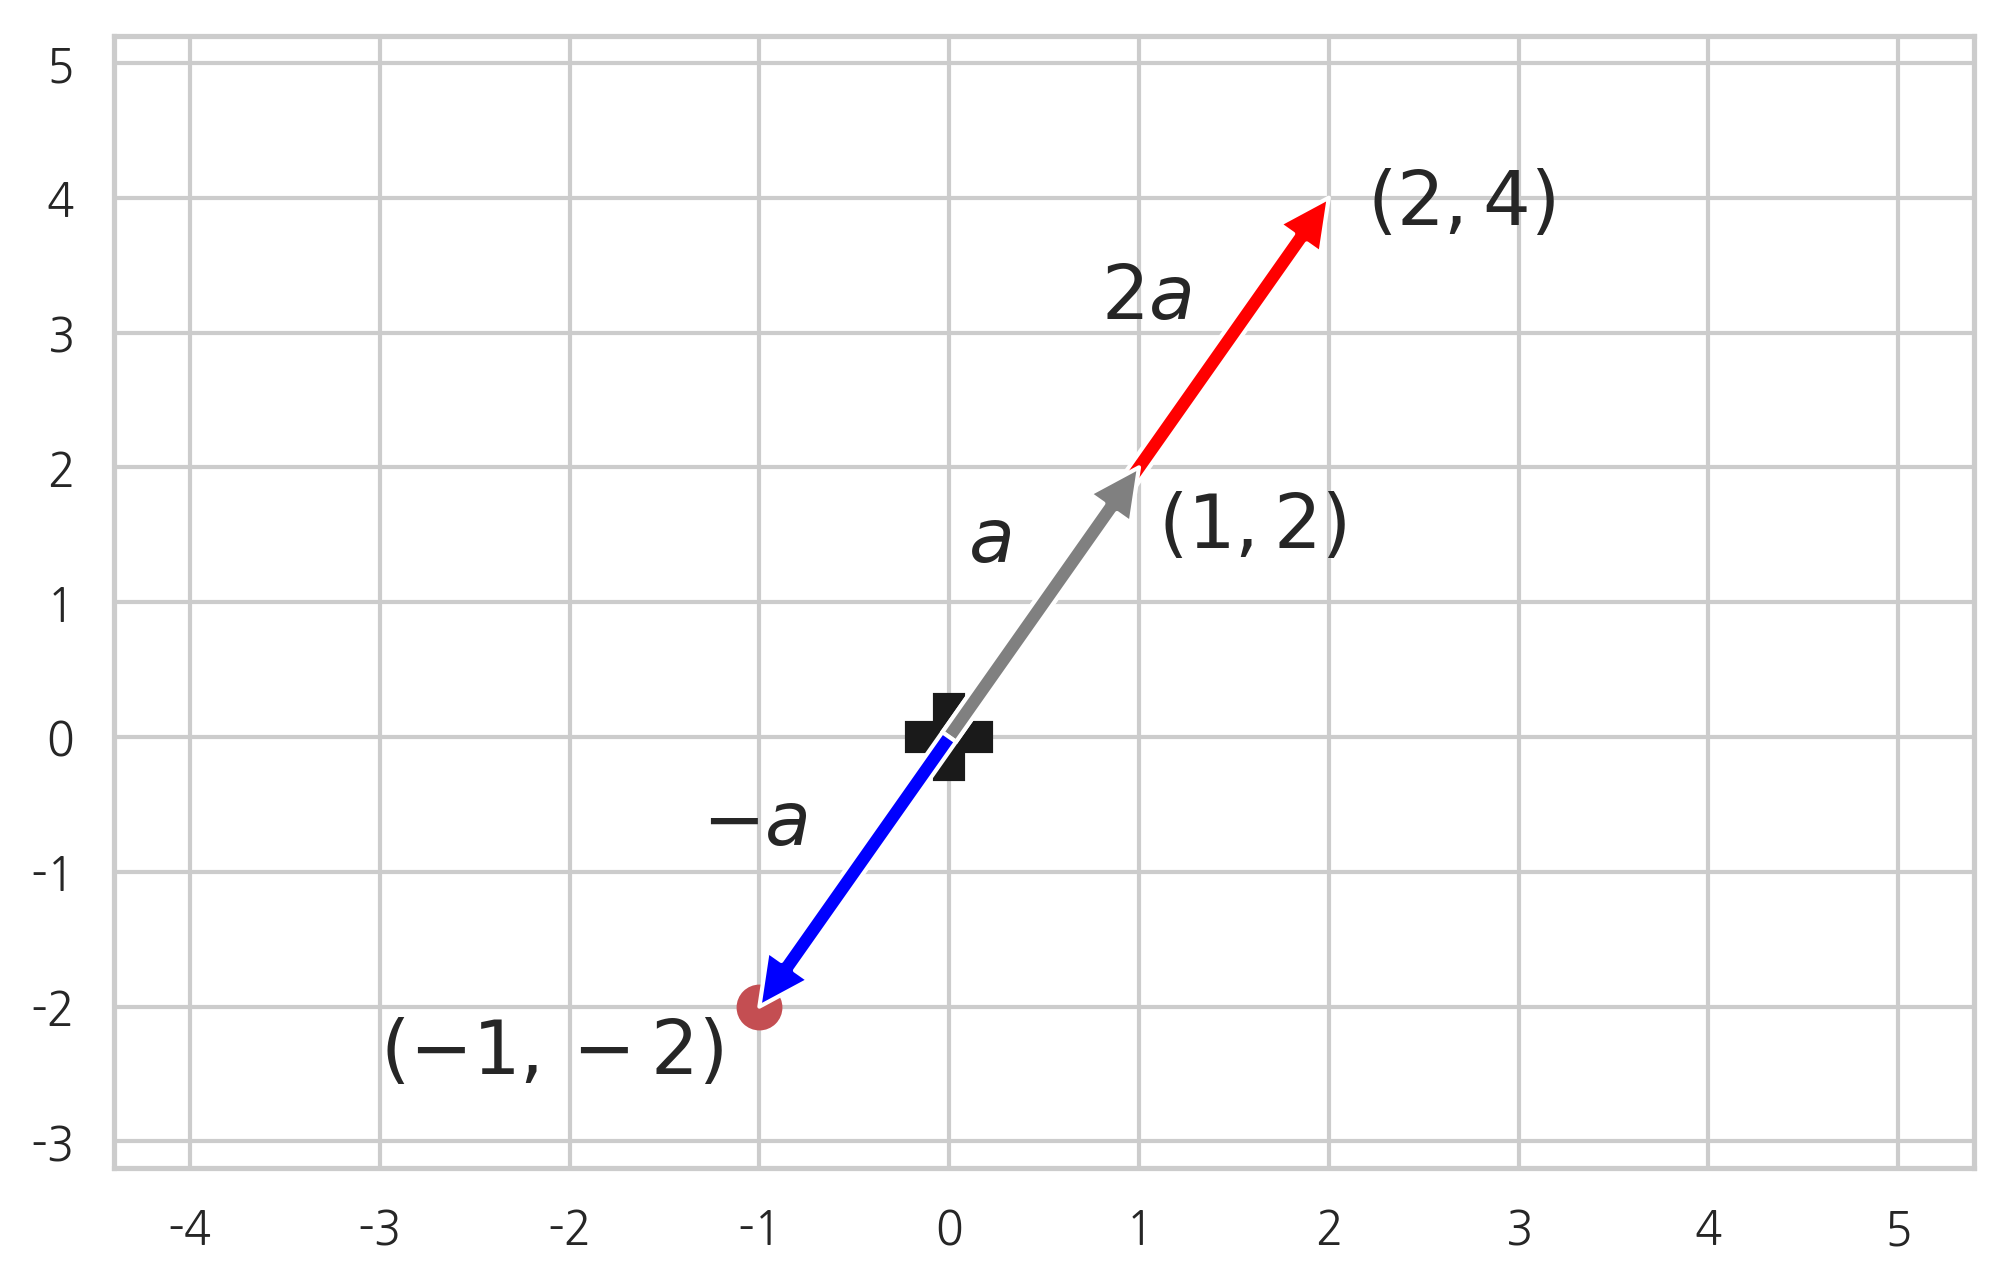

In [4]:
a = np.array([1, 2])
b = 2 * a
c = -a
plt.annotate('', xy=b, xytext=(0, 0), arrowprops={"facecolor": "red"})
plt.text(0.8, 3.1, "$2a$")
plt.text(2.2, 3.8, "$(2, 4)$")
plt.annotate('', xy=a, xytext=(0, 0), arrowprops={"facecolor": "gray"})
plt.text(0.1, 1.3, "$a$")
plt.text(1.1, 1.4, "$(1, 2)$")
plt.plot(c[0], c[1], 'ro', ms=10)
plt.annotate('', xy=c, xytext=(0, 0), arrowprops={"facecolor": "blue"})
plt.text(-1.3, -0.8, "$-a$")
plt.text(-3, -2.5, "$(-1, -2)$")
plt.plot(0, 0, 'kP', ms=20)
plt.xticks(np.arange(-5, 6))
plt.yticks(np.arange(-5, 6))
plt.xlim(-4.4, 5.4)
plt.ylim(-3.2, 5.2)
plt.show()

## 단위 벡터

길이가 1인 벡터를 단위 벡터(unit vector)라고 한다. 예를 들어 다음과 같은 벡터들은 모두 단위 벡터이다.

$$ 
\label{1234.5678}
a = \begin{bmatrix}1 \\ 0\end{bmatrix} ,\;\;
b = \begin{bmatrix}0 \\ 1\end{bmatrix} ,\;\;
c = \begin{bmatrix} \dfrac{1}{\sqrt{2}} \\ \dfrac{1}{\sqrt{2}} \end{bmatrix}
$$

임의의 벡터 $x$에 대해 다음 벡터는 벡터 $x$와 같은 방향을 가리키는 단위 벡터가 된다.

$$
\dfrac{x}{\| x \|}
$$

In [5]:
a = np.array([1, 0])
b = np.array([0, 1])
c = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
np.linalg.norm(a), np.linalg.norm(b), np.linalg.norm(c)

(1.0, 1.0, 0.9999999999999999)

## 벡터의 합

벡터와 벡터의 합도 벡터가 된다. 이때 **두 벡터의 합은 그 두 벡터를 이웃하는 변으로 가지는 평행사변형의 대각선 벡터**가 된다.

$$ 
a = \begin{bmatrix}1 \\ 2\end{bmatrix} ,\;\;
b = \begin{bmatrix}2 \\ 1\end{bmatrix} \;\;\; \rightarrow \;\;\;
c = a + b = \begin{bmatrix}3 \\ 3\end{bmatrix} 
$$

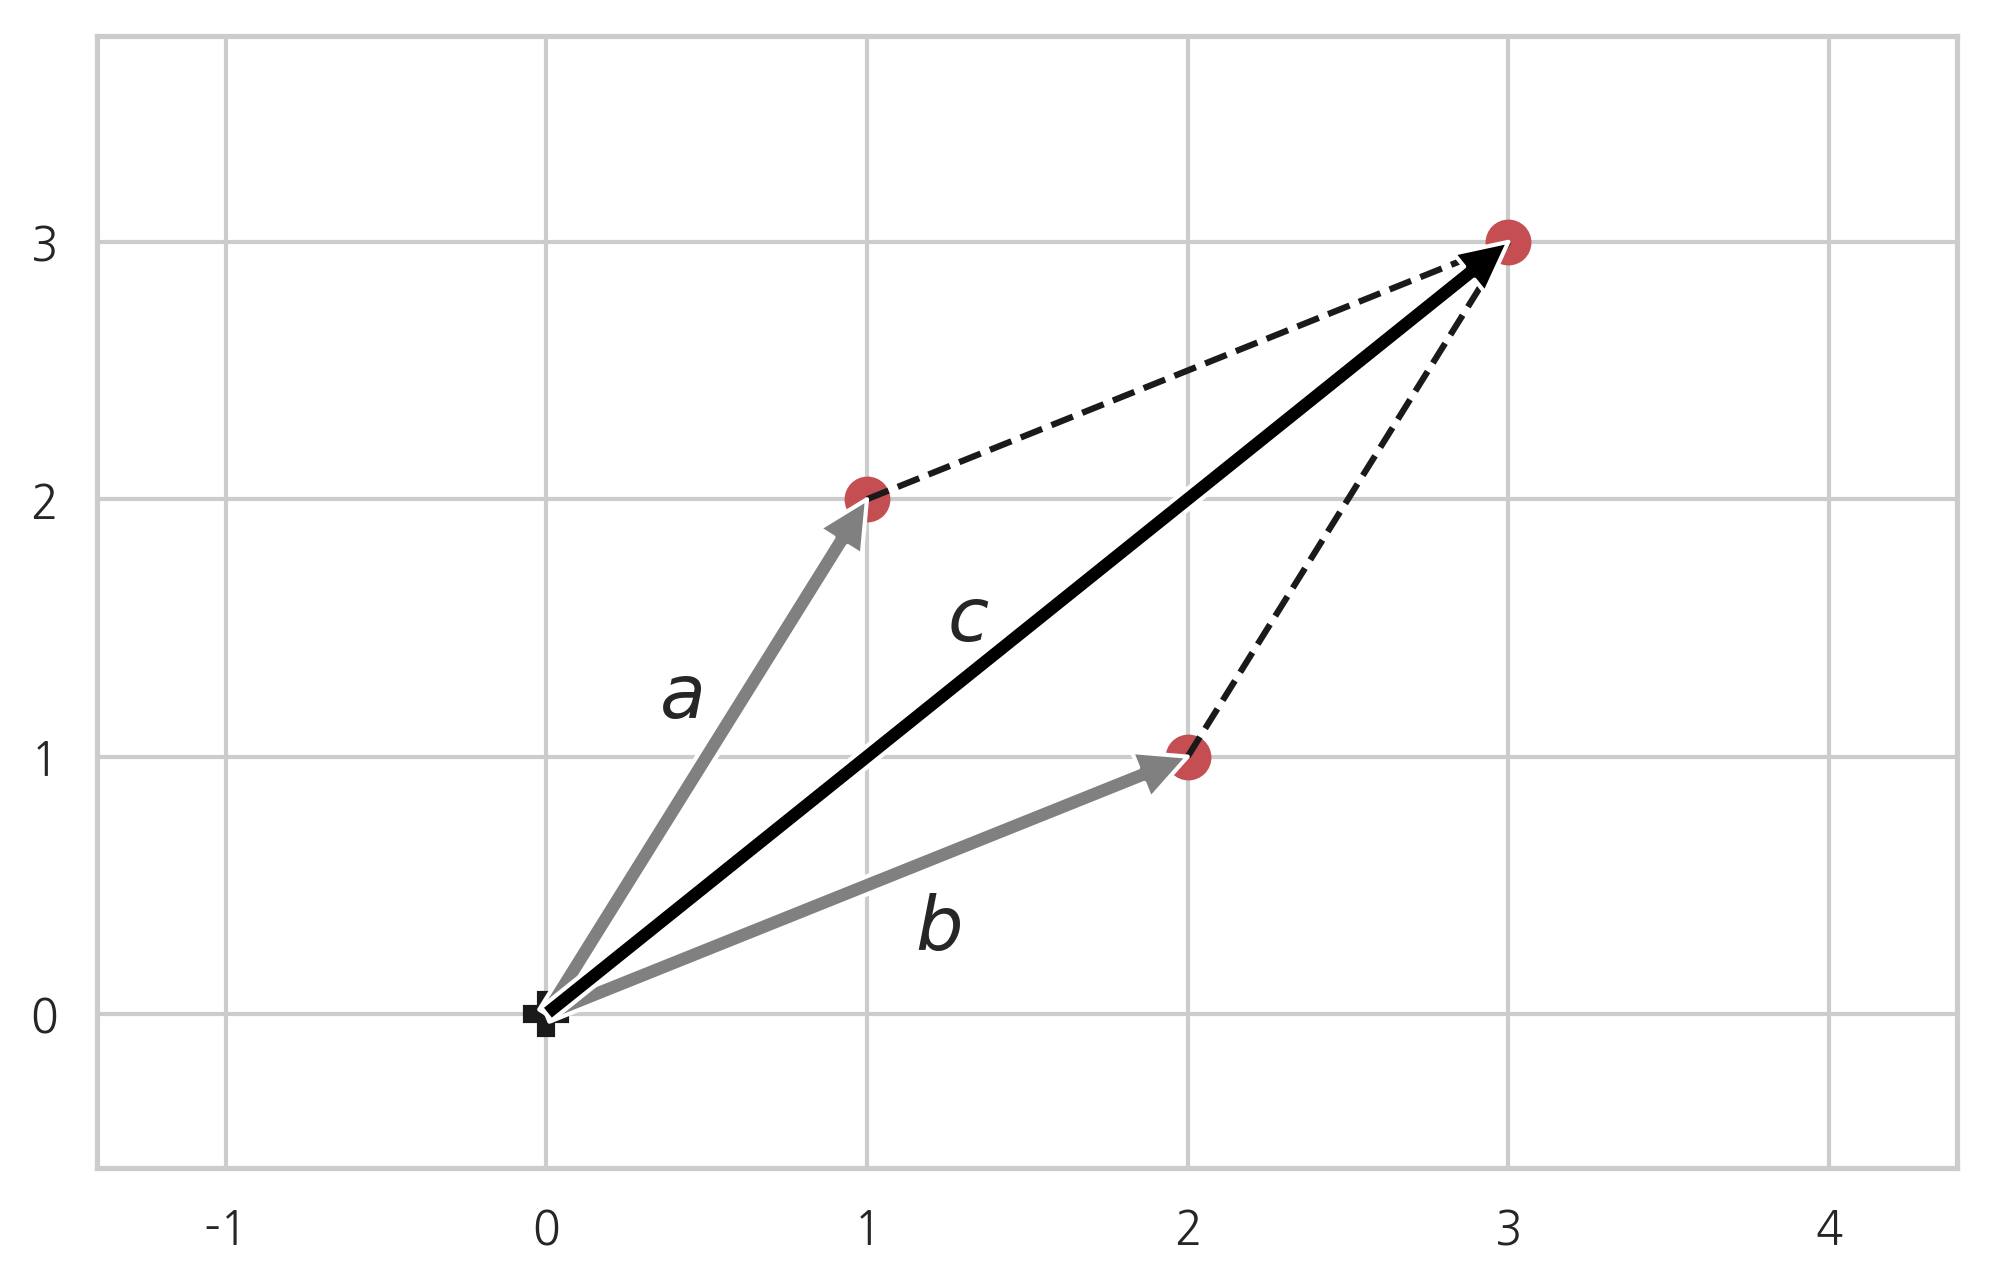

In [6]:
a = np.array([1, 2])
b = np.array([2, 1])
c = a + b
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=c, xytext=(0, 0), arrowprops=dict(facecolor='black'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.plot(c[0], c[1], 'ro', ms=10)
plt.plot([a[0], c[0]], [a[1], c[1]], 'k--')
plt.plot([b[0], c[0]], [b[1], c[1]], 'k--')
plt.text(0.35, 1.15, "$a$")
plt.text(1.15, 0.25, "$b$")
plt.text(1.25, 1.45, "$c$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.4, 4.4)
plt.ylim(-0.6, 3.8)
plt.show()

또는 벡터를 더하고자 하는 벡터의 끝점으로 평행이동 가리키는 점의 위치로 샹각할 수도 있다.

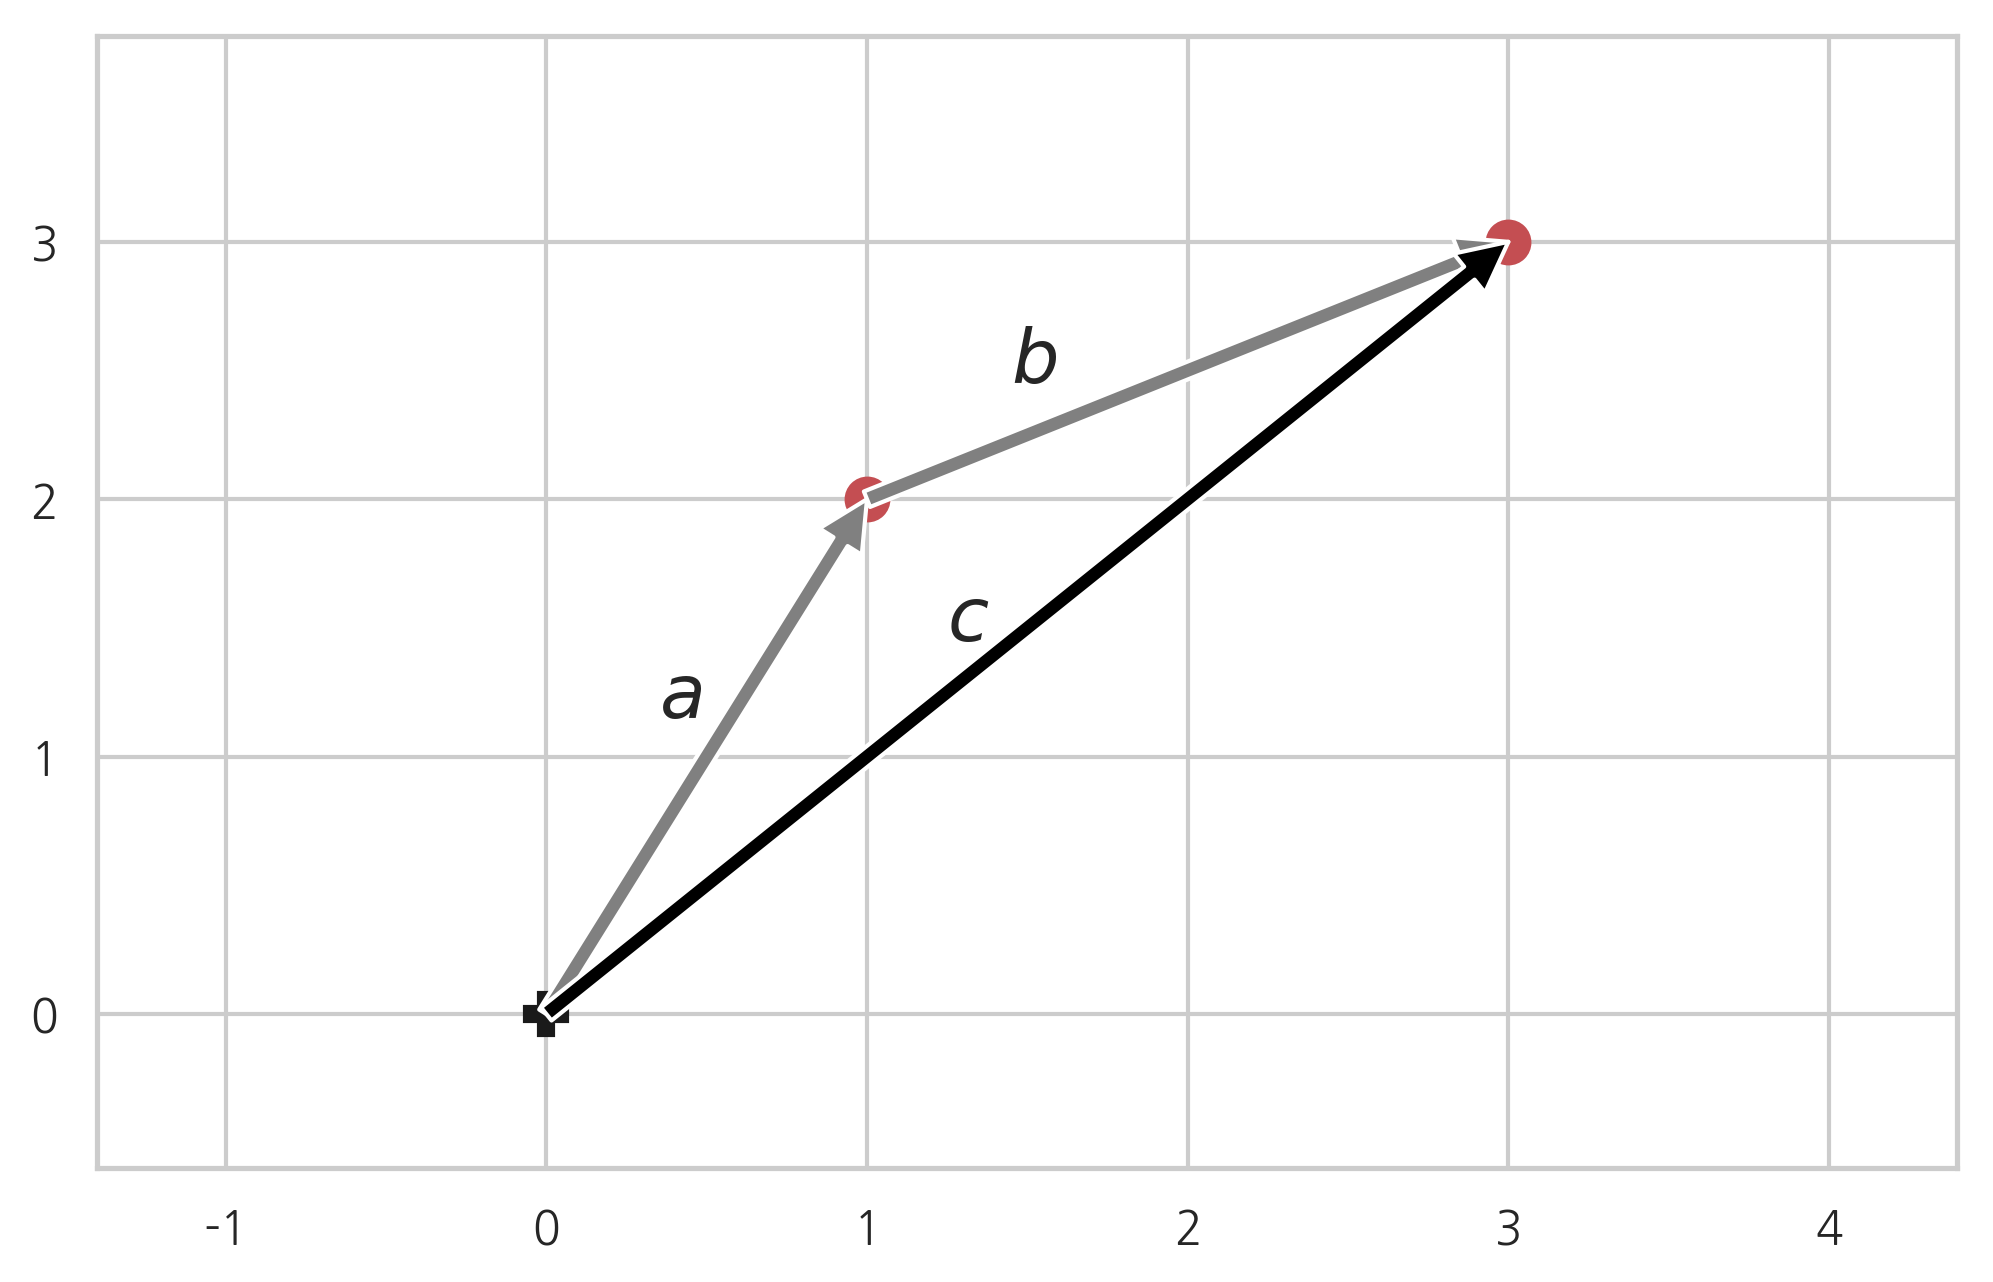

In [7]:
a = np.array([1, 2])
b = np.array([2, 1])
c = a + b
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=c, xytext=a, arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=c, xytext=(0, 0), arrowprops=dict(facecolor='black'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(c[0], c[1], 'ro', ms=10)
plt.text(0.35, 1.15, "$a$")
plt.text(1.45, 2.45, "$b$")
plt.text(1.25, 1.45, "$c$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.4, 4.4)
plt.ylim(-0.6, 3.8)
plt.show()

둘 중 어느 벡터를 평행이동해도 결과는 마찬가지이다.

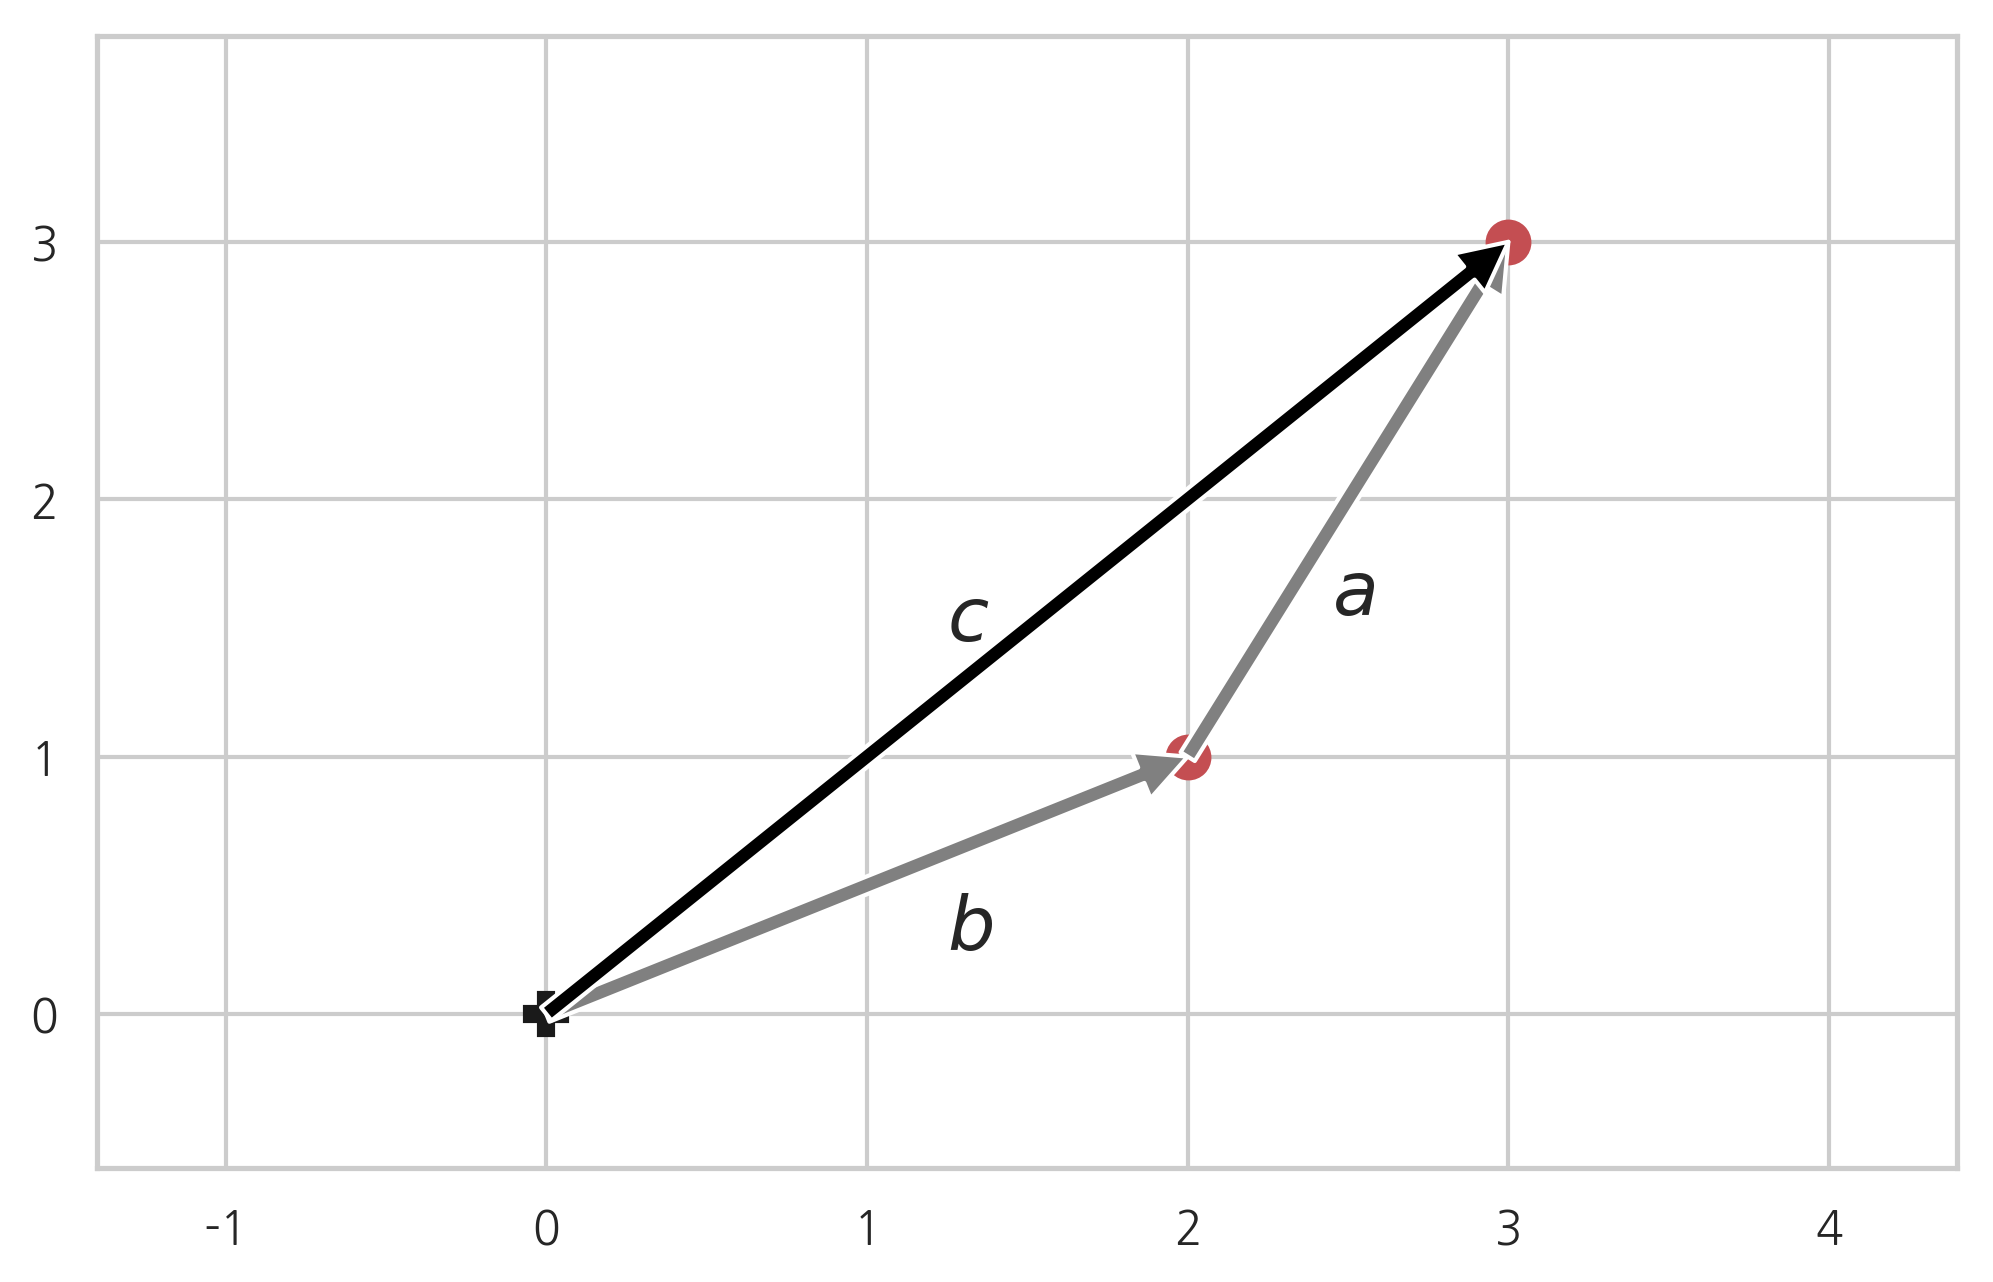

In [8]:
a = np.array([1, 2])
b = np.array([2, 1])
c = a + b
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=c, xytext=b, arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=c, xytext=(0, 0), arrowprops=dict(facecolor='black'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.plot(c[0], c[1], 'ro', ms=10)
plt.text(2.45, 1.55, "$a$")
plt.text(1.25, 0.25, "$b$")
plt.text(1.25, 1.45, "$c$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.4, 4.4)
plt.ylim(-0.6, 3.8)
plt.show()

## 벡터의 선형조합

지금가지 벡터의 스칼라곱이 어떤 새로운 벡터가 되고 두 벡터의 합이 어떤 새로운 벡터가 살펴보았다. 여러개의 벡터를 스칼라곱을 한 후 더하면 선형조합(linear combination)이 된다.

$$ c_1x_1 + c_2x_2 + \cdots + c_Nx_N  $$

이 식에서 $c_1, \cdots, c_N$은 스칼라 계수이다.

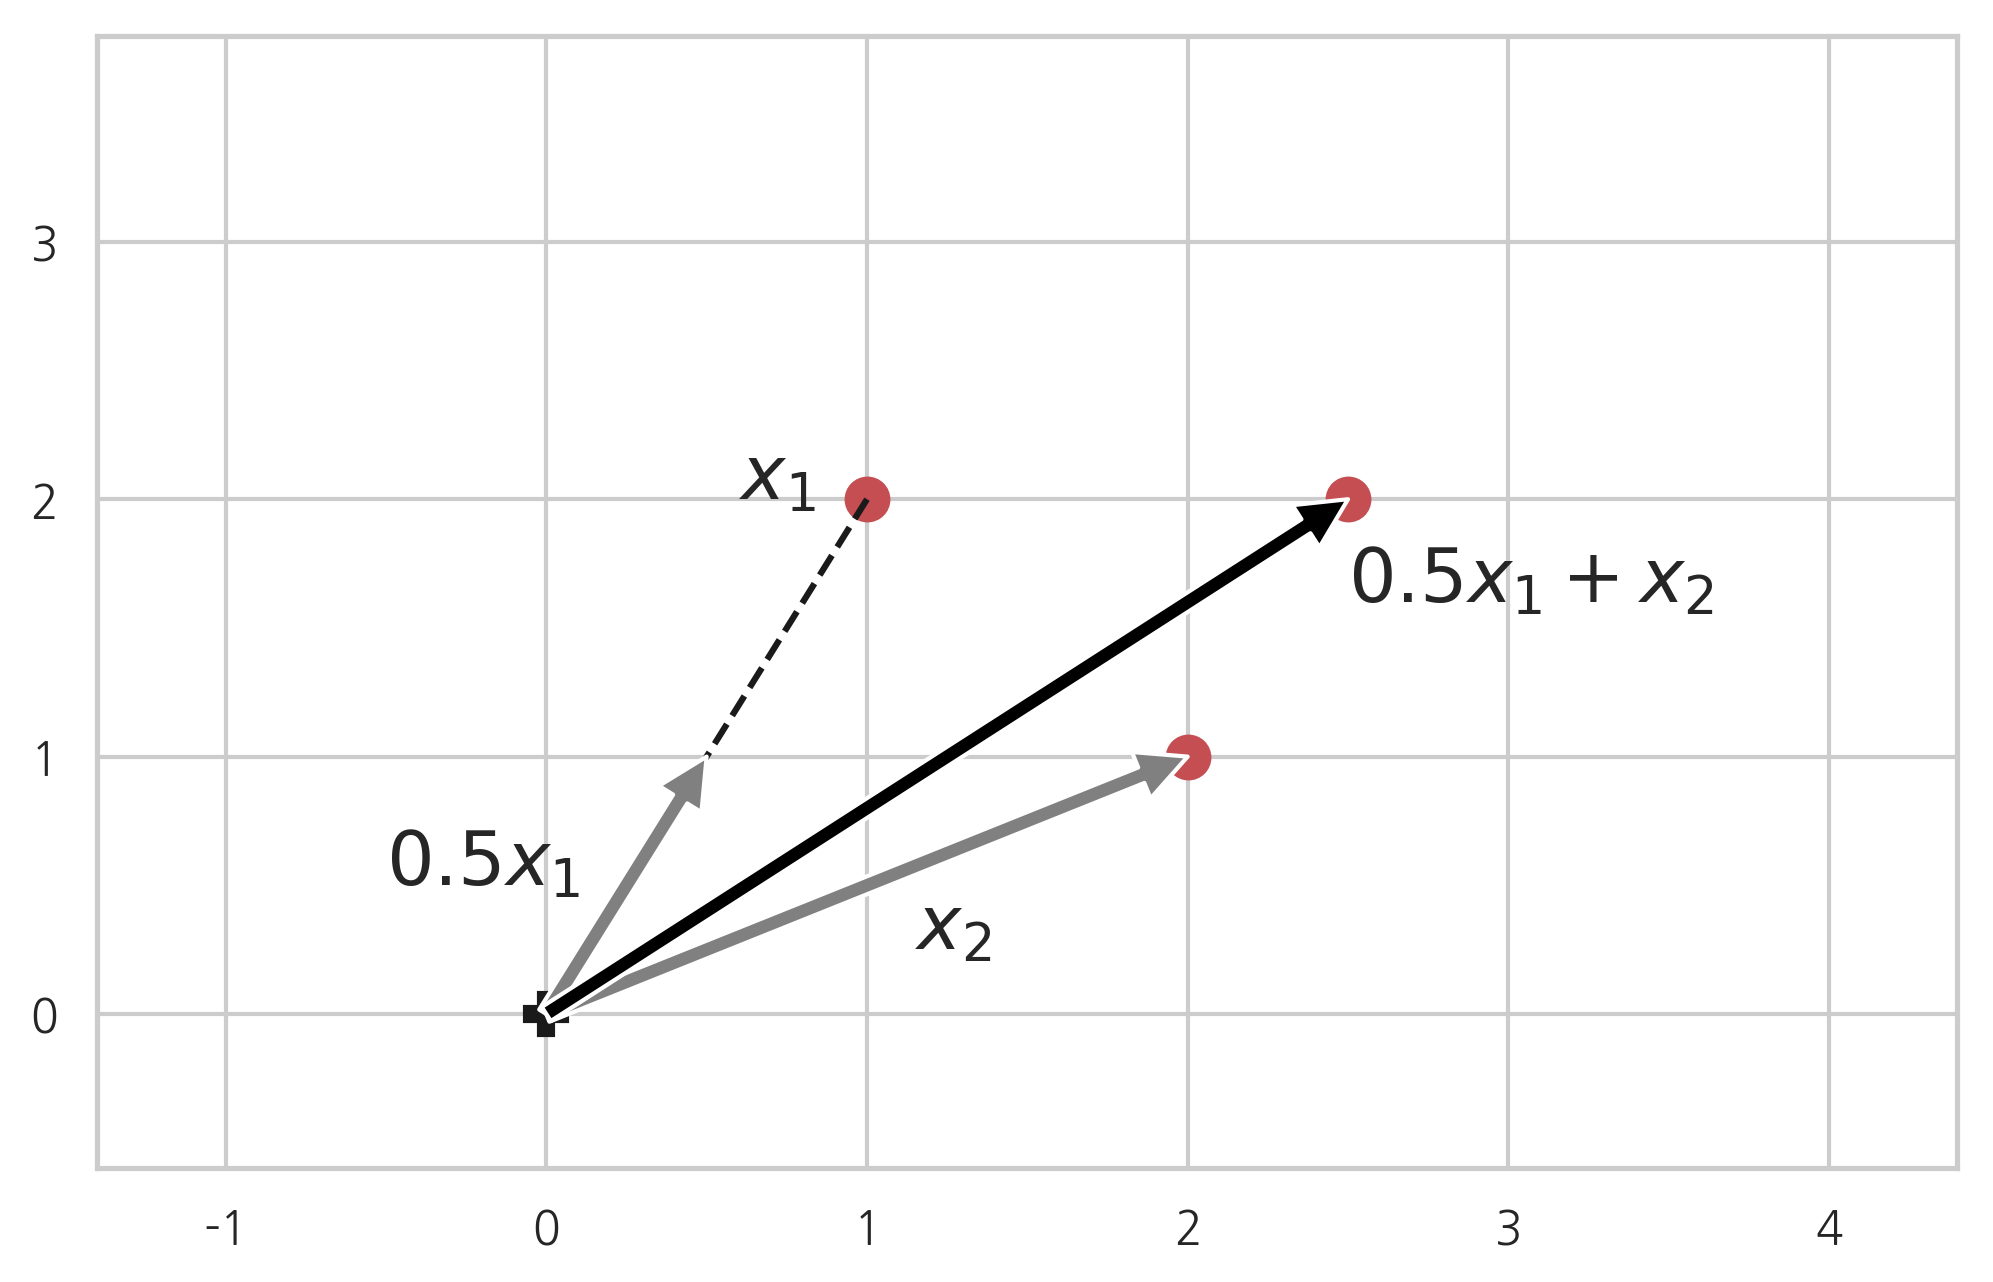

In [9]:
x1 = np.array([1, 2])
x2 = np.array([2, 1])
x3 = 0.5 * x1 + x2
plt.annotate('', xy=0.5*x1, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=x2, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=x3, xytext=(0, 0), arrowprops=dict(facecolor='black'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(x1[0], x1[1], 'ro', ms=10)
plt.plot(x2[0], x2[1], 'ro', ms=10)
plt.plot(x3[0], x3[1], 'ro', ms=10)
plt.plot([x1[0], 0], [x1[1], 0], 'k--')
plt.text(0.6, 2.0, "$x_1$")
plt.text(-0.5, 0.5, "$0.5x_1$")
plt.text(1.15, 0.25, "$x_2$")
plt.text(2.5, 1.6, "$0.5x_1 + x_2$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.4, 4.4)
plt.ylim(-0.6, 3.8)
plt.show()

#### 연습 문제 5.3.1

벡터 $x_1$, $x_2$가 다음과 같을 때, $c_1x_1+ c_2x_2$가 다음 벡터와 같아지는 선형조합 계수 $c_1, c_2$를 찾아라.

$$ 
x_1 = \begin{bmatrix}1 \\ 2\end{bmatrix} ,\;\;
x_2 = \begin{bmatrix}2 \\ 1\end{bmatrix} 
$$

1. 

$$ 
c_1x_1 + c_2x_2 = \begin{bmatrix}3 \\ 1\end{bmatrix} 
$$
<br>

1. 

$$ 
c_1x_1 + c_2x_2 = \begin{bmatrix} -1 \\ -1\end{bmatrix} 
$$

## 벡터의 차

**벡터의 차 $a - b = c$는 벡터 $b$가 가리키는 점으로부터 벡터 $a$가 가리키는 점을 연결하는 벡터**이다. 그 이유는 벡터 $b$에 벡터 $a-b$를 더하면, 즉 벡터 $b$와 벡터 $a-b$를 연결하면 벡터 $a$가 되어야 하기 때문이다.

$$ a - b = c  $$

$$ b + c = b + (a-b) = a  $$

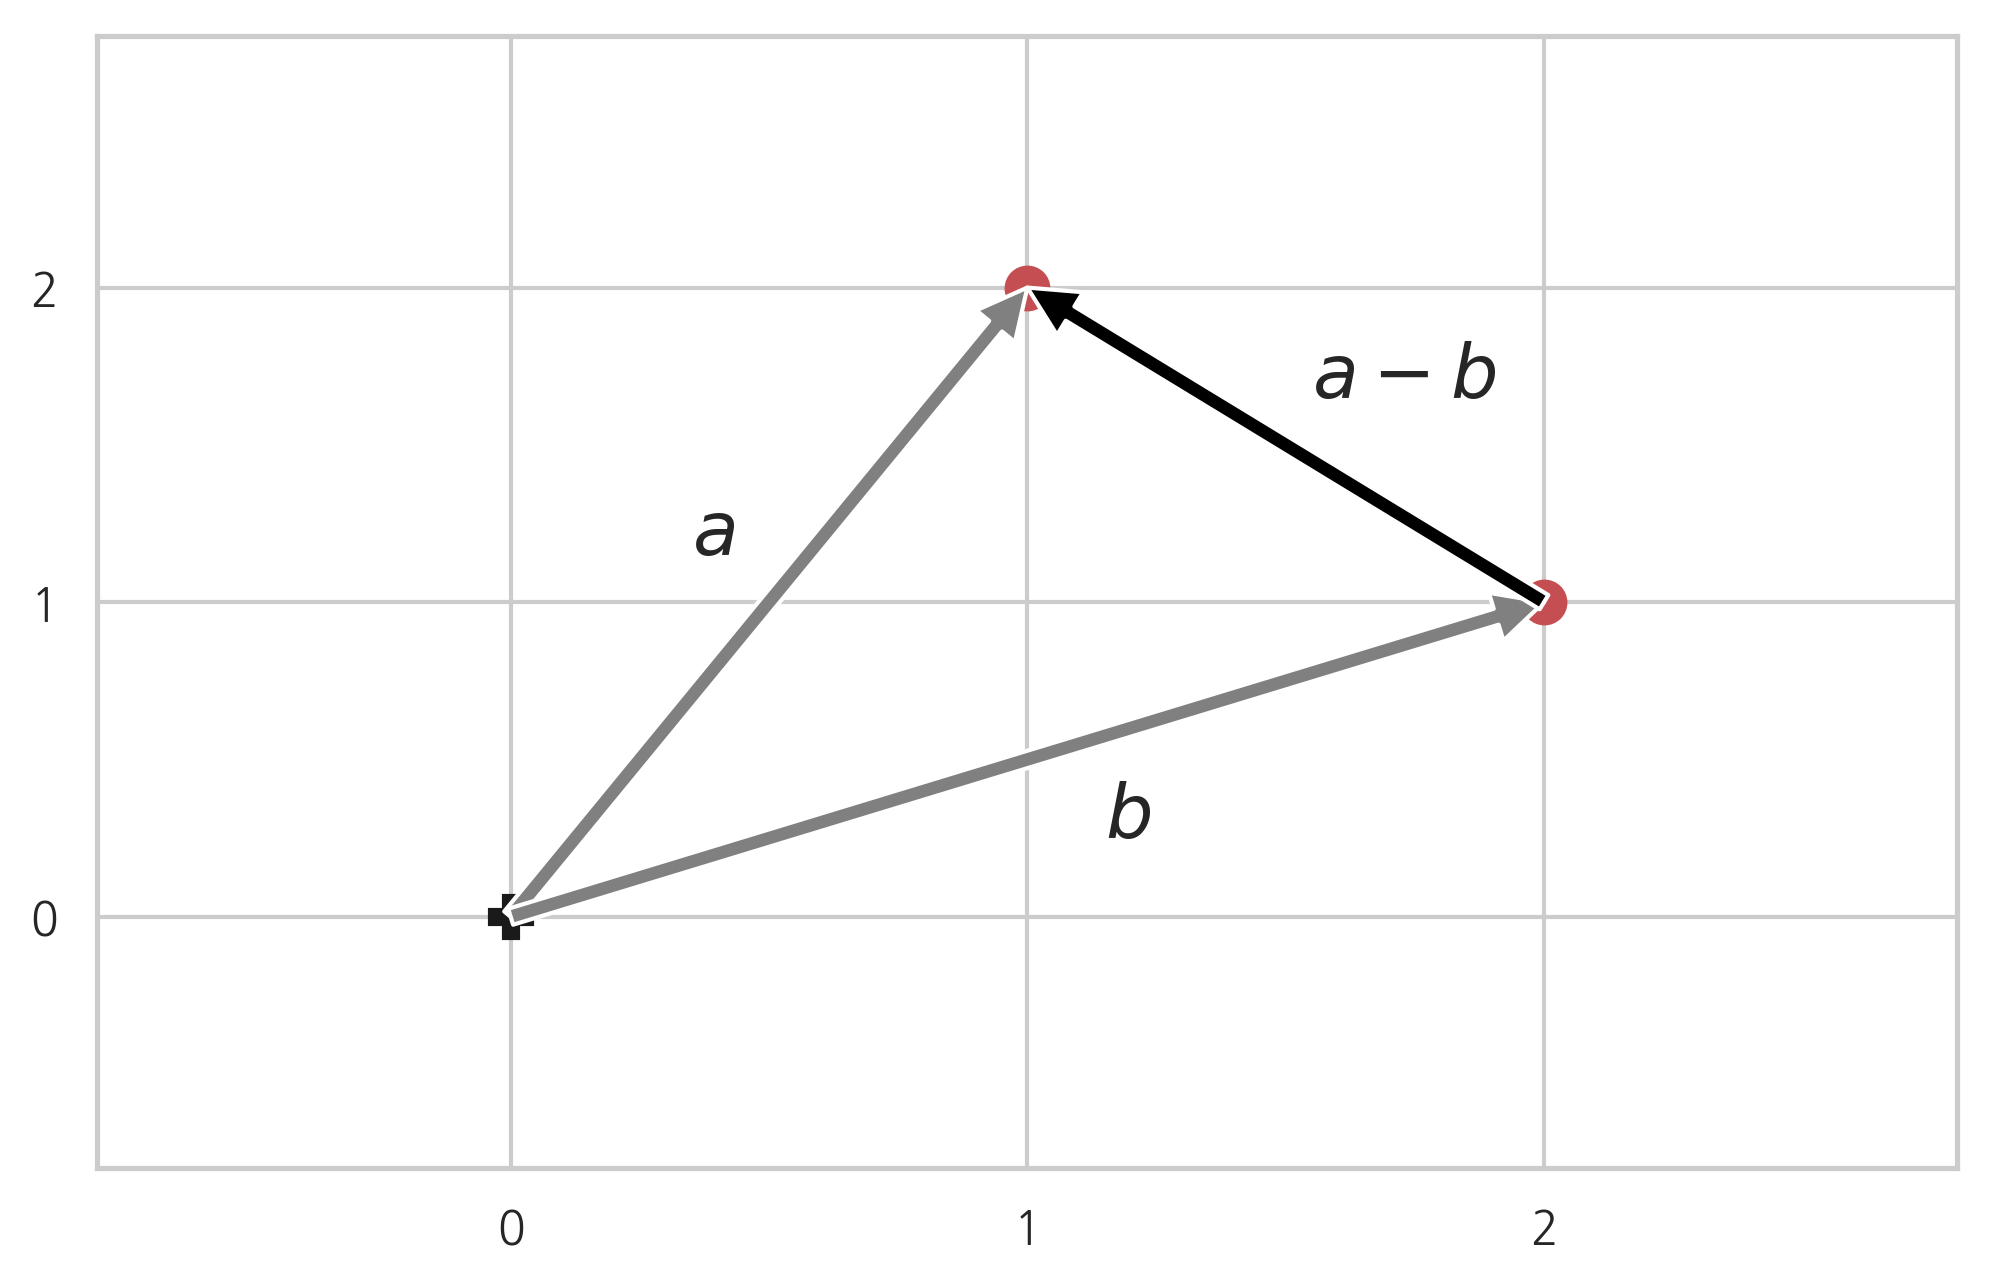

In [10]:
a = np.array([1, 2])
b = np.array([2, 1])
c = a - b
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=a, xytext=b, arrowprops=dict(facecolor='black'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.text(0.35, 1.15, "$a$")
plt.text(1.15, 0.25, "$b$")
plt.text(1.55, 1.65, "$a-b$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-0.8, 2.8)
plt.ylim(-0.8, 2.8)
plt.show()

## Word2Vec

나중에 인공신경망 부분에서 공부하게 될 **word2vec** 방법을 이용하면 단어(word)를 공간상의 점 또는 벡터(vector)로 표현할 수 있다. word2vec으로 만들어진 벡터는 단어의 의미에 따라 다음처럼 평행사변형 관계를 가질 수도 있다. 

$$ \text{woman} = \text{man} + (\text{queen} - \text{king})  $$

`queen - king`은 king에서 queen으로 향하는 벡터이다. 즉 의미론적으로 king에서 **국가 최고 권력자라는 의미는 남겨둔 채로 여성성을 추가하는 행위(action)**에 비유할 수 있다. 이러한 행위를 man에 대해서 적용한 결과가 `man + (queen - king)`이다. word2vec 학습 결과에서 이렇게 계산한 위치에 가장 가까이 있는 단어를 찾으면 `woman`이 나온다.

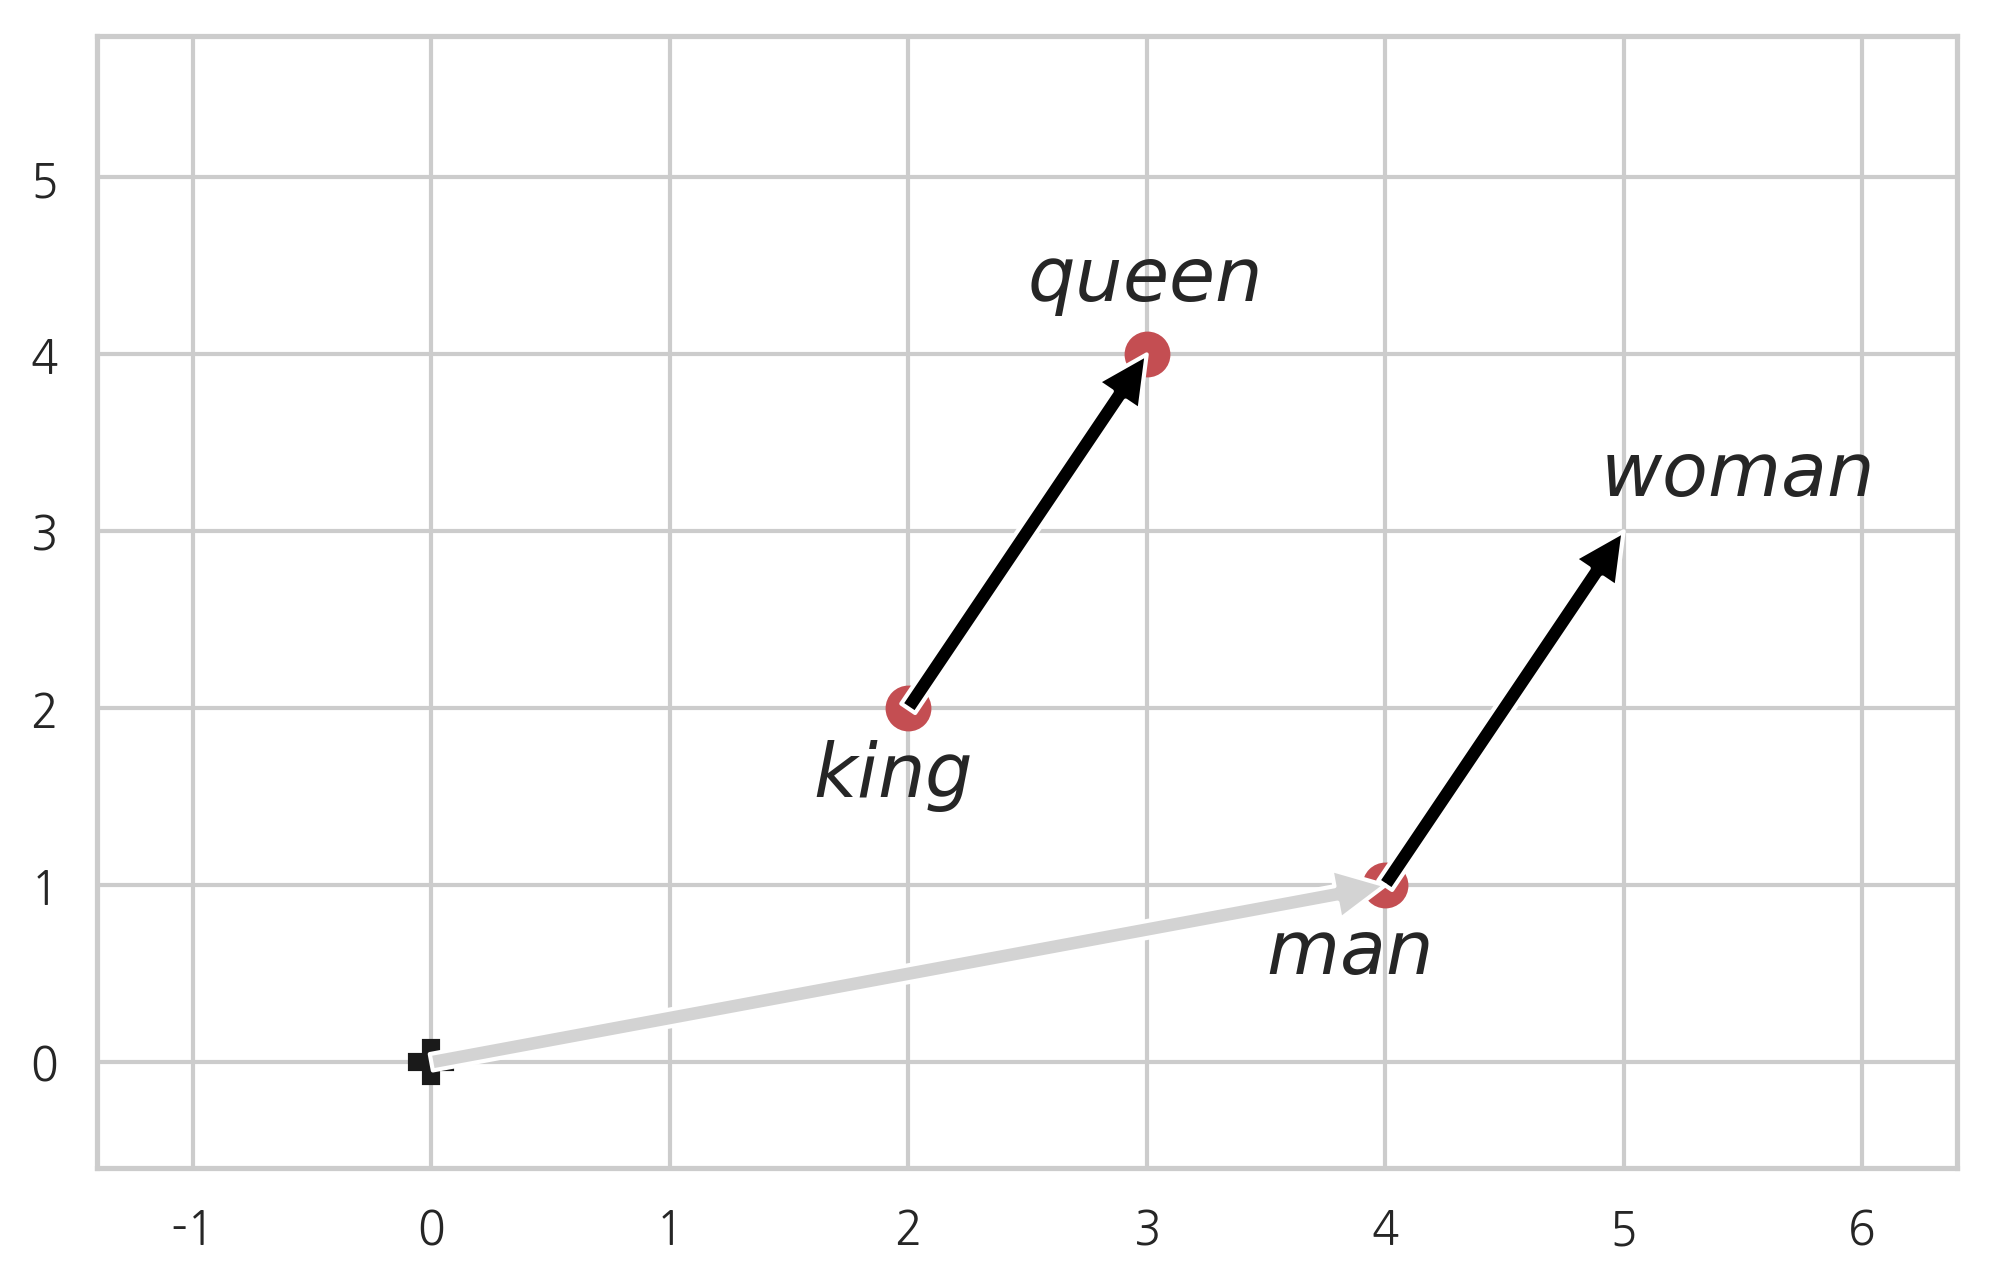

In [11]:
a = np.array([2, 2])  # king
b = np.array([3, 4])  # queen
c = np.array([4, 1])  # man
d = a + (c - a)
e = b + (c - a)
plt.annotate('', xy=b, xytext=a, arrowprops=dict(facecolor='black'))
plt.annotate('', xy=e, xytext=d, arrowprops=dict(facecolor='black'))
plt.annotate('', xy=c, xytext=[0, 0], arrowprops=dict(facecolor='lightgray'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.plot(c[0], c[1], 'ro', ms=10)
plt.text(1.6, 1.5, "$king$")
plt.text(2.5, 4.3, "$queen$")
plt.text(3.5, 0.5, "$man$")
plt.text(4.9, 3.2, "$woman$")
plt.xticks(np.arange(-2, 7))
plt.yticks(np.arange(-1, 6))
plt.xlim(-1.4, 6.4)
plt.ylim(-0.6, 5.8)
plt.show()

#### 연습 문제 5.3.2

남자배우, 여자배우, 남자, 여자, 이렇게 4가지 단어에 대응하는 4개의 벡터에 대해 위와 같은 관계가 성립한다고 가정하자. 다음 식을 완성하라.

$$ \text{남자배우} = \text{여자배우} + ?  $$

## 유클리드 거리

두 벡터가 가리키는 점 사이의 거리를 **유클리드 거리(Euclidean distance)**라고 한다. 두 벡터의 유클리드 거리는 **벡터의 차의 길이**로 구할 수 있다.

벡터의 놈의 정의와 벡터의 차의 정의에서 유클리드 거리는 다음처럼 구한다.

$$ 
\begin{eqnarray} 
\| a - b \|
&=& \sqrt{\sum_{i=1} (a_i - b_i)^2} \\
&=& \sqrt{\sum_{i=1} ( a_i^2 - 2 a_i b_i + b_i^2 )} \\
&=& \sqrt{\sum_{i=1} a_i^2 + \sum_{i=1} b_i^2 - 2 \sum_{i=1} a_i b_i} \\
&=& \sqrt{\| a \|^2 + \| b \|^2  - 2 a^Tb }
\end{eqnarray}
$$

즉,

$$
\| a - b \|^2 = \| a \|^2 + \| b \|^2 - 2 a^T b
$$

## 벡터의 내적과 삼각함수


두 벡터의 내적은 다음처럼 벡터의 길이 $\|a\|$, $\|b\|$ 와 두 벡터 사이의 각도 $\theta$의 코사인 함수값으로 계산할 수도 있다.

$$ a^Tb = \|a\|\|b\| \cos\theta  $$

여기에서 $\cos\theta$는 **코사인(cosine)**이라고 하는 함수이다. 코사인은 사인(sine)이라고 하는 함수와 함께 정의할 수 있다. 사인과 코사인을 합쳐서 삼각함수라고 한다.

사인 $\sin\theta$의 값은 $\theta$라는 각을 가지는 직각 삼각형에서 빗변과 높이의 비율을 뜻한다.
코사인 $\cos\theta$의 값은 $\theta$라는 각을 가지는 직각 삼각형에서 빗변과 밑변의 비율을 뜻한다.

$$ \sin\theta = \dfrac{\text{높이}}{\text{빗변}}  $$

$$ \cos\theta = \dfrac{\text{밑변}}{\text{빗변}}  $$

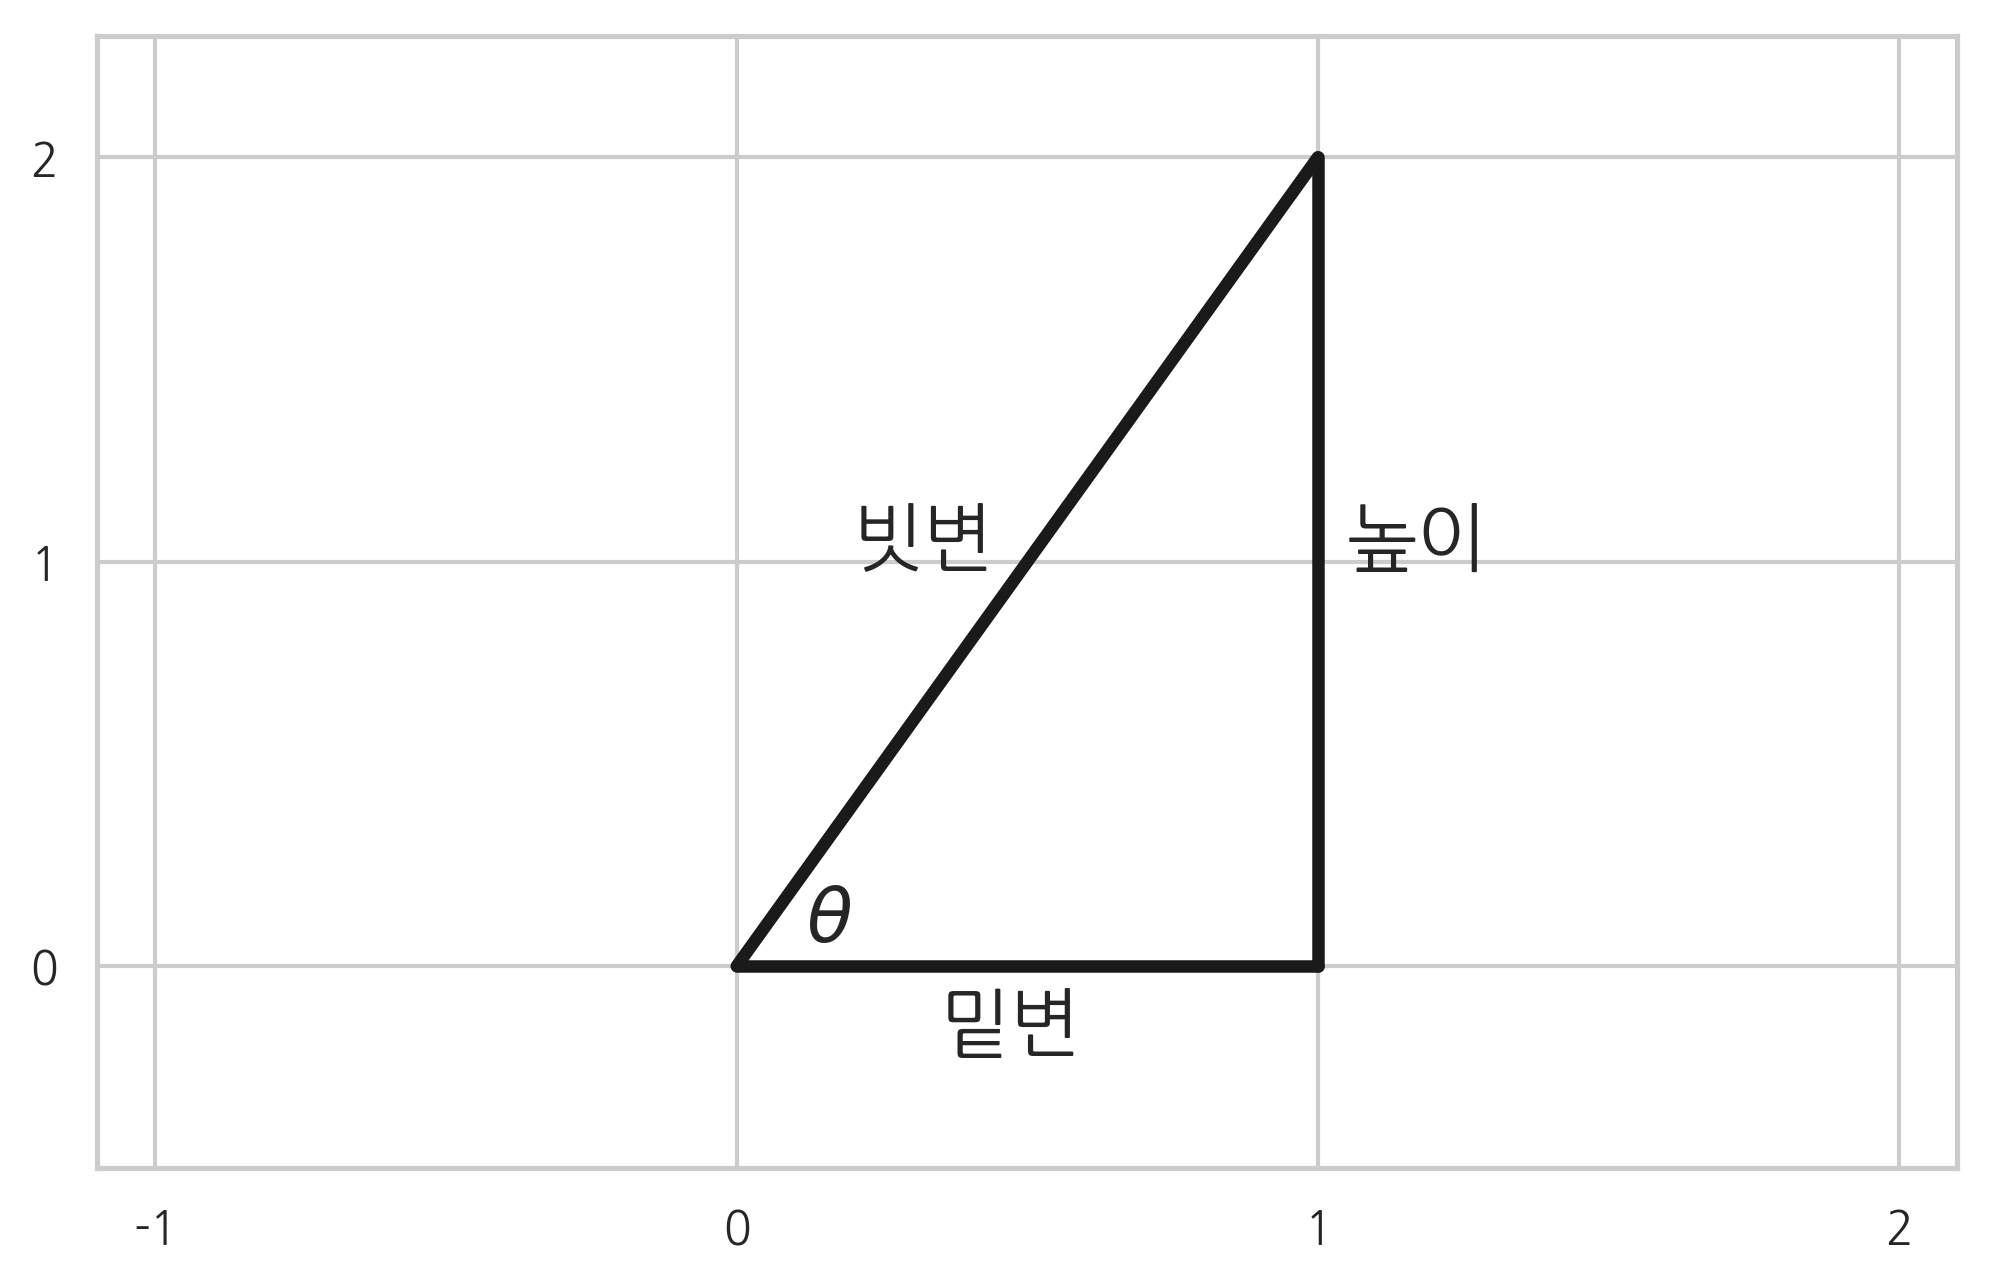

In [12]:
plt.plot([0, 1], [0, 2], 'k-', lw=3)
plt.plot([0, 1], [0, 0], 'k-', lw=3)
plt.plot([1, 1], [0, 2], 'k-', lw=3)
plt.text(0.2, 1, "빗변")
plt.text(0.35, -0.2, "밑변")
plt.text(1.05, 1, "높이")
plt.text(0.12, 0.06, r"$\theta$")
plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.1, 2.1)
plt.ylim(-0.5, 2.3)
plt.show()

$\sin\theta$의 값은 $\theta$가 0에 가까워질수록 0에 가까워지고 $\theta$가 $90{}^{\circ}$에 가까워질수록 1에 가까워진다. 

$$ \sin 0^{\circ} = 0  $$

$$ \sin 90^{\circ} = 1  $$


반대로 $\cos\theta$의 값은 $\theta$가 0에 가까워질수록 1에 가까워지고 $\theta$가 $90{}^{\circ}$에 가까워질수록 0에 가까워진다. 

$$ \cos 0^{\circ} = 1  $$

$$ \cos 90^{\circ} = 0  $$

함수의 그래프로 표현하면 다음과 같다.

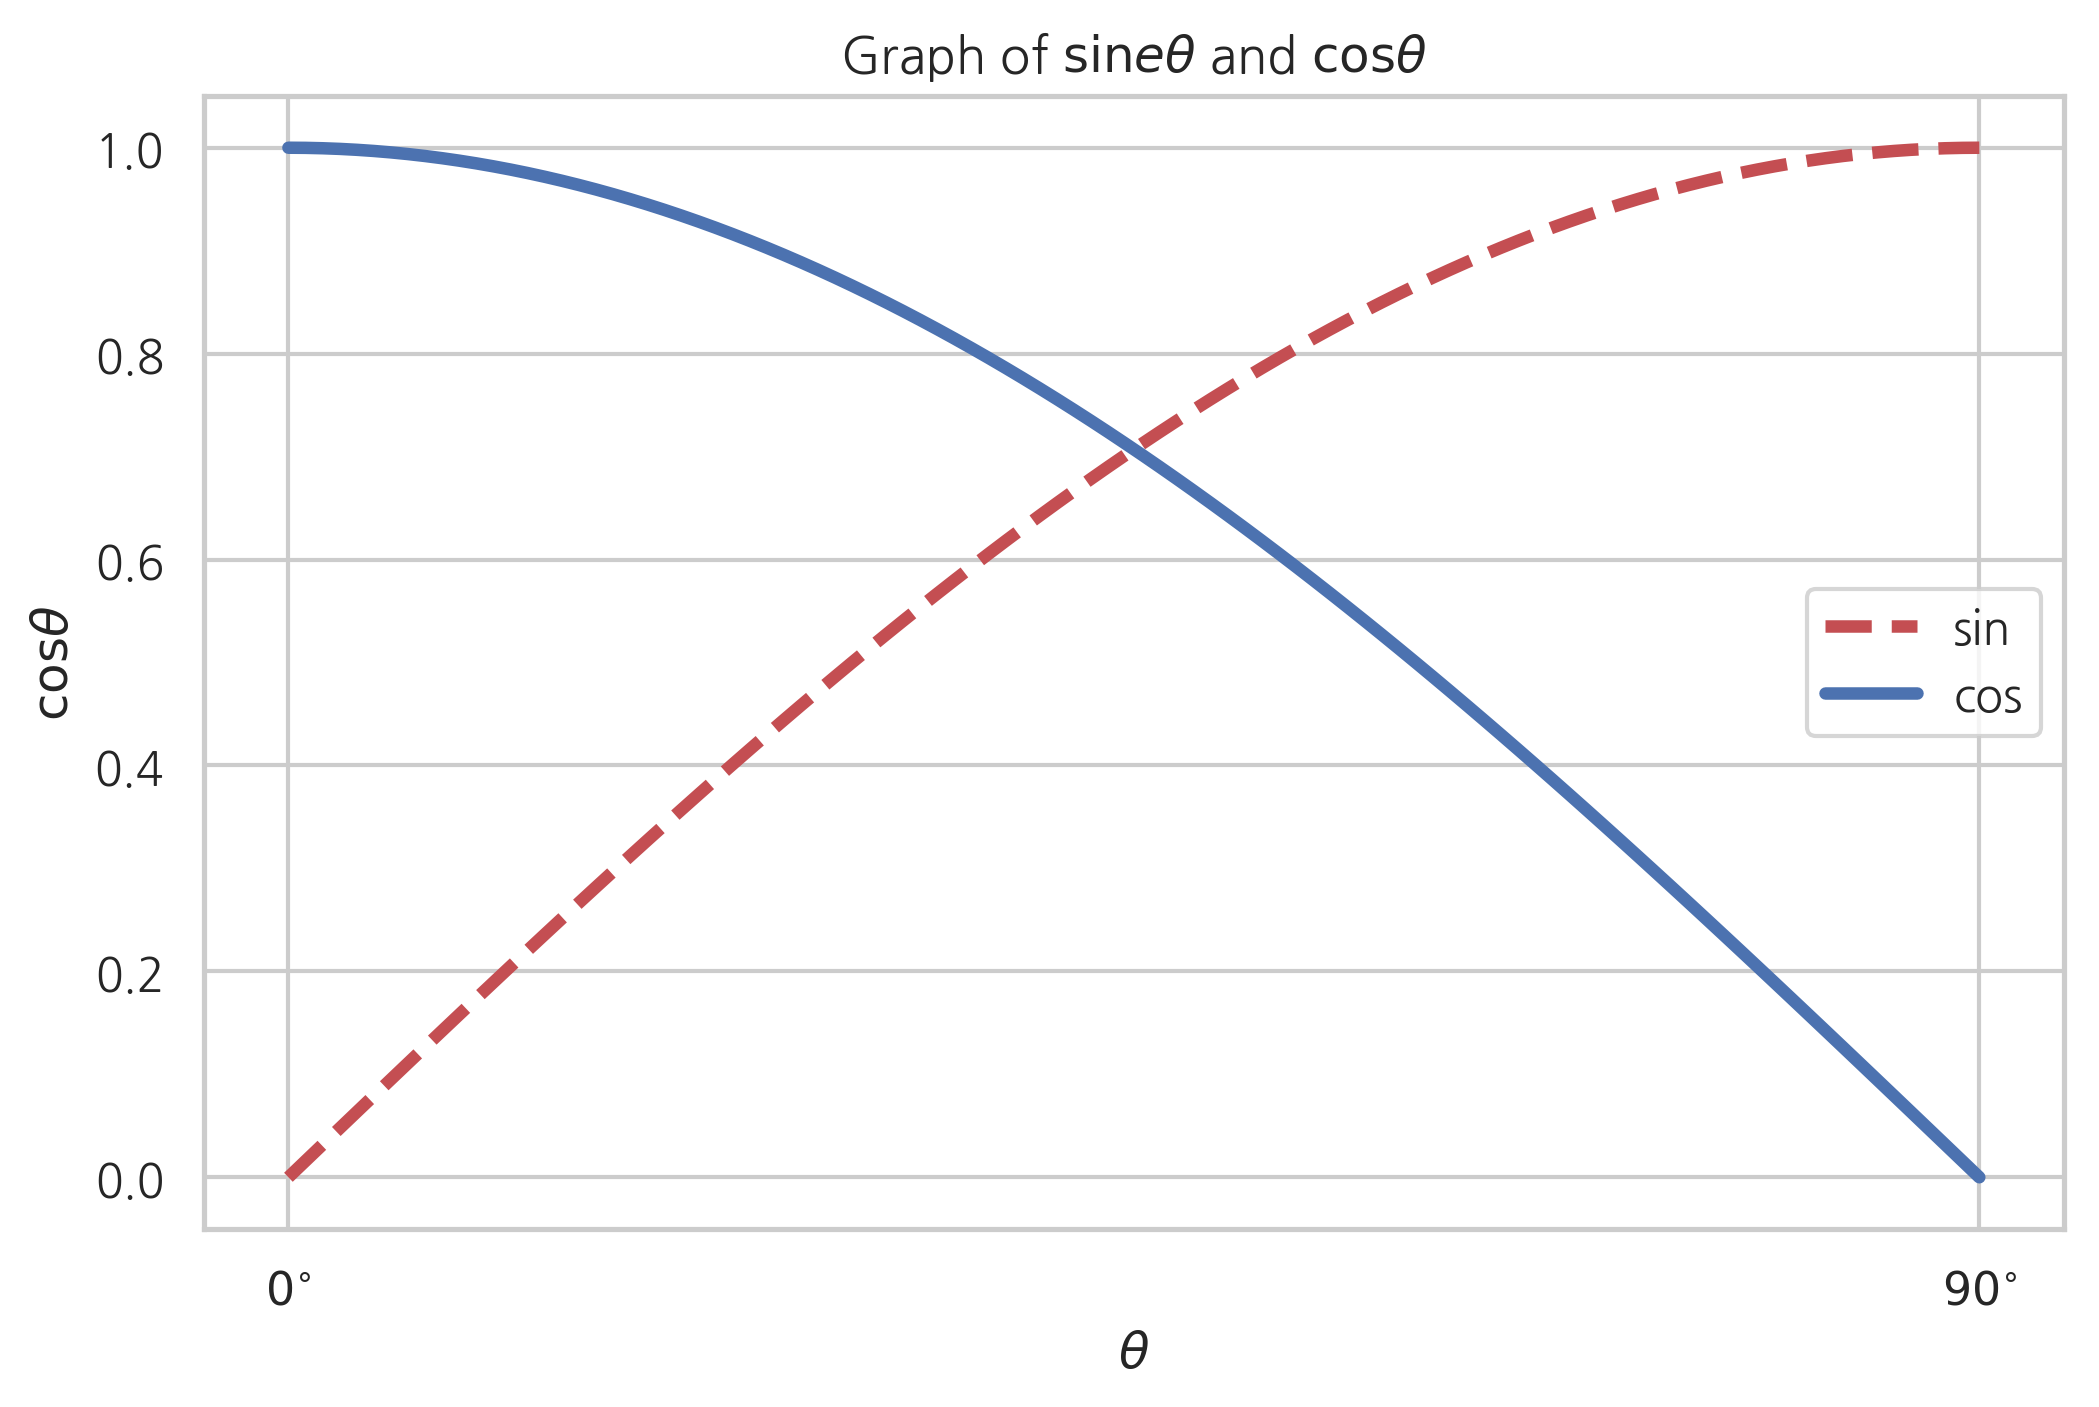

In [13]:
x = np.linspace(0, np.pi/2, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, 'r--', lw=3,  label="sin")
plt.plot(x, y2, 'b-', lw=3, label="cos")
plt.legend()
plt.xticks([0, np.pi/2], [r'$0^{\circ}$', r'$90^{\circ}$'])
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\cos\theta$")
plt.title(r"Graph of $\sine\theta$ and $\cos\theta$")
plt.show()

## 직교

두 벡터 $a$와 $b$가 이루는 각이 90도이면 서로 **직교(orthogonal)**라고 하며 $a \perp b$로 표시한다.

$\cos 90^{\circ} = 0$이므로  서로 직교인 두 벡터의 내적은 0이된다.

$$ a^T b = b^T a = 0   \;\;\;\; \leftrightarrow \;\;\;\; a \perp b   $$

예를 들어 다음 두 벡터는 서로 직교한다.

$$ 
a = \begin{bmatrix}1 \\ 1\end{bmatrix} ,\;\;
b = \begin{bmatrix}-1 \\ 1\end{bmatrix} \;\;\;\; \rightarrow \;\;\;\;
a^T b = \begin{bmatrix}1 & 1\end{bmatrix} \begin{bmatrix}-1 \\ 1\end{bmatrix} = -1 + 1 = 0
$$

In [14]:
a = np.array([1, 1])
b = np.array([-1, 1])
np.dot(a, b)

0

#### 연습 문제 5.3.3

1. 다음 벡터에 대해 직교하는 단위벡터를 찾아라.
$$ 
x = \begin{bmatrix} 1 \\ 0  \end{bmatrix} 
$$

1. 다음 벡터에 대해 직교하는 단위벡터를 찾아라.
$$ 
x = \begin{bmatrix} 1 \\ 1  \end{bmatrix} 
$$

1. 다음 두 벡터에 대해 모두 직교하는 단위벡터를 찾아라.
$$ 
x = \begin{bmatrix} 1 \\ 1 \\ 0  \end{bmatrix}, \;\;
y = \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} 
$$



## 정규직교

만약 $N$개의 단위 벡터 $v_1, v_2, \cdots, v_N$가 서로 직교하면 **정규직교(orthonormal)**라고 한다.

$$ |v_i| = 1 \;\;\leftrightarrow \;\; v_i^Tv_i = 1 $$


$$ v_i^T v_j = 0 \;\;(i \neq j) $$

#### 연습 문제 5.3.4

직교하는 두 벡터 $a, b$에 대해 다음 식이 성립함을 보여라

$$
\| a + b \|^2 = \| a \|^2 + \| b \|^2 
$$

#### 연습 문제 5.3.5

정규직교하는 벡터 $v_1, v_2, v_3$로 이루어진 행렬 $V$에 대해서 다음 등식이 성립함을 보여라

$$
V = 
\begin{bmatrix}
v_1 & v_2 & v_3
\end{bmatrix}
$$


1. 
$$ 
V^TV = I
$$
<br>

2. 
$$ V^{-1} = V^T $$

## 코사인 유사도

두 벡터의 방향이 비슷할 수록 벡터가 비슷하다고 간주하여 두 벡터 사이의 각의 코사인 값을 **코사인 유사도(cosine similarity)**라고 한다. 코사인 값은 각도가 0일때 가장 커지므로 두 벡터가 같은 뱡향을 가리키고 있으면 코사인 유사도가 최대값이 1을 가진다.

$$ \text{코사인 유사도} = \cos\theta = \dfrac{x^Ty}{\|x\|\|y\|}  $$

코사인 유사도는 나중에 공부할 **추천시스템(recommender system)**에서 사용자의 취향이 얼마나 비슷한지를 계산할 때 사용된다.

코사인 유사도를 이용하면 다음처럼 **코사인 거리(cosine distance)**도 정의할 수 있다.

$$ \text{코사인 거리} = 1 - \text{코사인 유사도} = 1 - \dfrac{x^Ty}{\|x\|\|y\|}  $$


#### 연습 문제 5.3.6

a, b, c, 3명의 사용자가 4개의 영화에 대해 준 감상점수를 다음처럼 벡터로 표현하였다.

$$ 
a = \begin{bmatrix} 4 \\ 5 \\ 2 \\ 2 \end{bmatrix}, \;\;
b = \begin{bmatrix} 4 \\ 0 \\ 3 \\ 2 \end{bmatrix}, \;\;
c = \begin{bmatrix} 2 \\ 2 \\ 0 \\ 1 \end{bmatrix} 
$$

1. a, b, c 사이의 유클리드 거리를 구하라. 어느 두 사용자가 가장 가까운가? 또 어느 두 사용자가 가장 멀리 떨어져 있는가?
2. a, b, c 사이의 코사인 거리를 구하라. 어느 두 사용자가 가장 가까운가? 또 어느 두 사용자가 가장 멀리 떨어져 있는가?

## 벡터의 분해와 성분

어떤 두 벡터 $a$, $b$의 합이 다른 벡터 $c$가 될 때 $c$가 두 벡터 **성분(vector component)** $a$, $b$으로 **분해(decomposition)**된다고 말한다.

#### 연습 문제 5.3.7

다음 벡터를 두 개의 벡터로 분해하는 방법을 두가지 이상 찾고 평면상에 각각 화살표로 표기하라.

$$ 
x = \begin{bmatrix} 1 \\ 0 \end{bmatrix} 
$$

## 프로젝션(투영)

벡터 $a$를 다른 벡터 $b$에 직교하는 성분과 벡터 $b$에 평행한 성분으로로 분해할 수 있는데, 평행한 성분을 **벡터 $b$에 대한 프로젝션(projection, 투영)**, 벡터 $b$에 수직인 성분을 **벡터 $b$에 대한 리젝션(rejection)**이라고 하며 각각 다음과 같이 표기한다.

$$ a^{\Vert b}  $$

$$ a^{\perp b}  $$

프로젝션 성분의 길이는 다음처럼 구할 수 있다.

$$ 
\| a^{\Vert b} \| = \|a\|\cos\theta = \dfrac{\|a\|\|b\|\cos\theta}{\|b\|}  = \dfrac{a^Tb}{\|b\|} = \dfrac{b^Ta}{\|b\|} 
$$

만약 벡터 $b$ 자체가 이미 단위벡터이면 **단위벡터에 대한 투영길이는 내적**이 된다.

$$ \| a^{\Vert b} \| = a^Tb $$

프로젝션 성분 벡터는 프로젝션 길이와 벡터 $b$ 방향의 단위 벡터의 곱이다.

$$ a^{\Vert b} = \dfrac{a^Tb}{\|b\|} \dfrac{b}{\|b\|}= \dfrac{a^Tb}{\|b\|^2}b  $$

리젝션 성분 벡터는 원래의 벡터에서 프로젝션 성분 벡터를 뺀 나머지이다.

$$ a^{\perp b} = a - a^{\Vert b}  $$

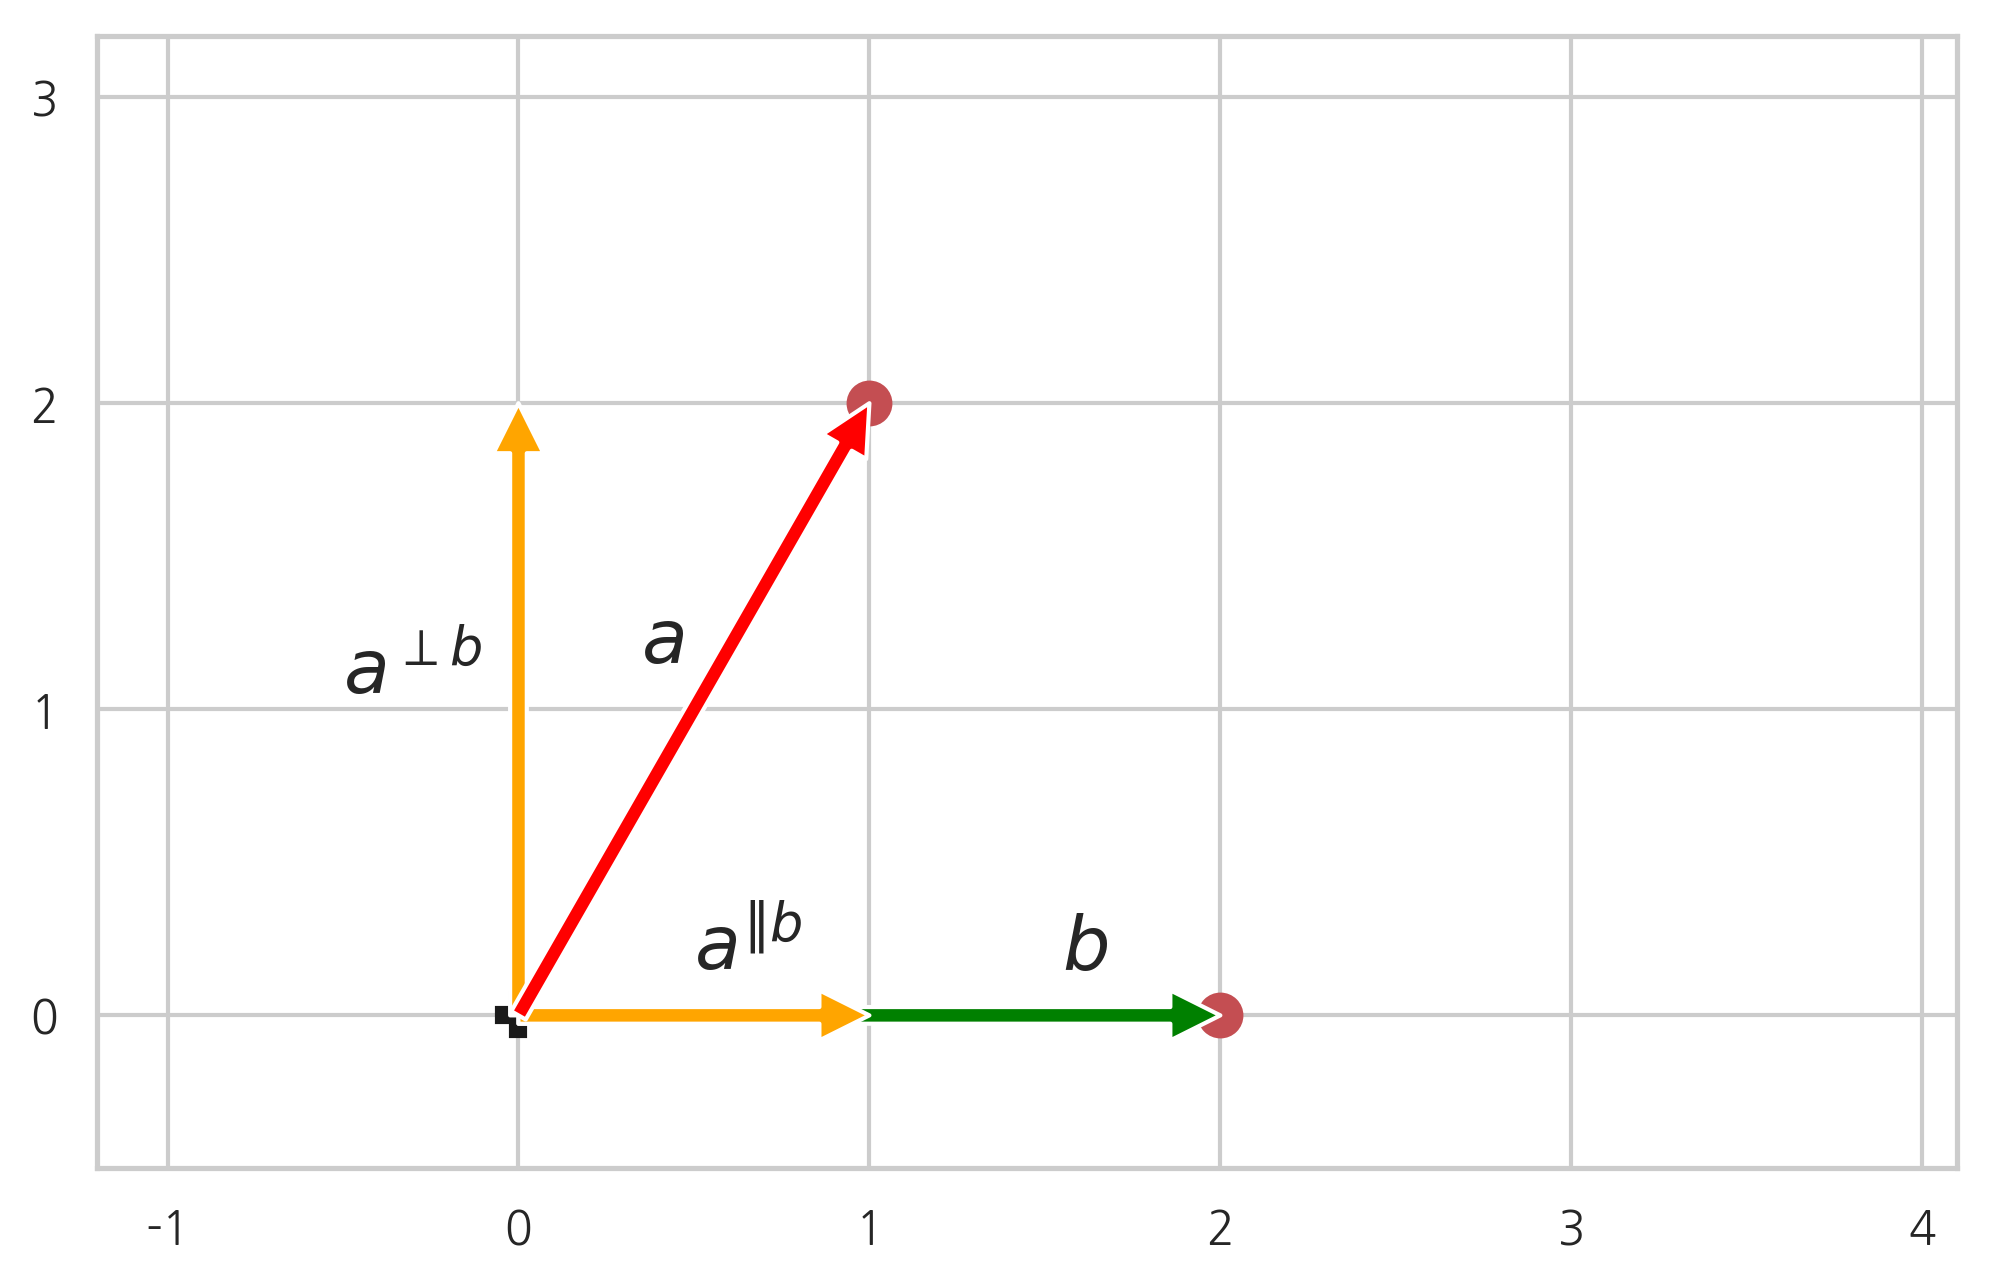

In [15]:
a = np.array([1, 2])
b = np.array([2, 0])
a2 = np.dot(a, b)/np.linalg.norm(b) * np.array([1, 0])
a1 = a - a2
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=dict(fc='green'))
plt.annotate('', xy=a2, xytext=(0, 0), arrowprops=dict(fc='orange'))
plt.annotate('', xy=a1, xytext=(0, 0), arrowprops=dict(fc='orange'))
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=dict(fc='red'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.text(0.35, 1.15, "$a$")
plt.text(1.55, 0.15, "$b$")
plt.text(-0.5, 1.05, "$a^{\perp b}$")
plt.text(0.50, 0.15, "$a^{\Vert b}$")
plt.xticks(np.arange(-10, 10))
plt.yticks(np.arange(-10, 10))
plt.xlim(-1.2, 4.1)
plt.ylim(-0.5, 3.2)
plt.show()

#### 연습 문제 5.3.8

$$ a=\begin{bmatrix}1 \\ 2\end{bmatrix}, \;\; b=\begin{bmatrix}2 \\ 0\end{bmatrix} $$ 

일 때, 프로젝션 $a^{\Vert b}$, 리젝션 $a^{\perp b}$를 구하라.

#### 연습 문제 5.3.9

만약 $v$가 원점을 지나는 직선의 방향을 나타내는 단위 벡터라고 하자. 이 때 그 직선위에 있지 않는 어떤 점 $x$와 그 직선과의 거리의 제곱이 다음과 같음을 증명하라.

$$ \| x \|^2 - (x^Tv)^2  $$

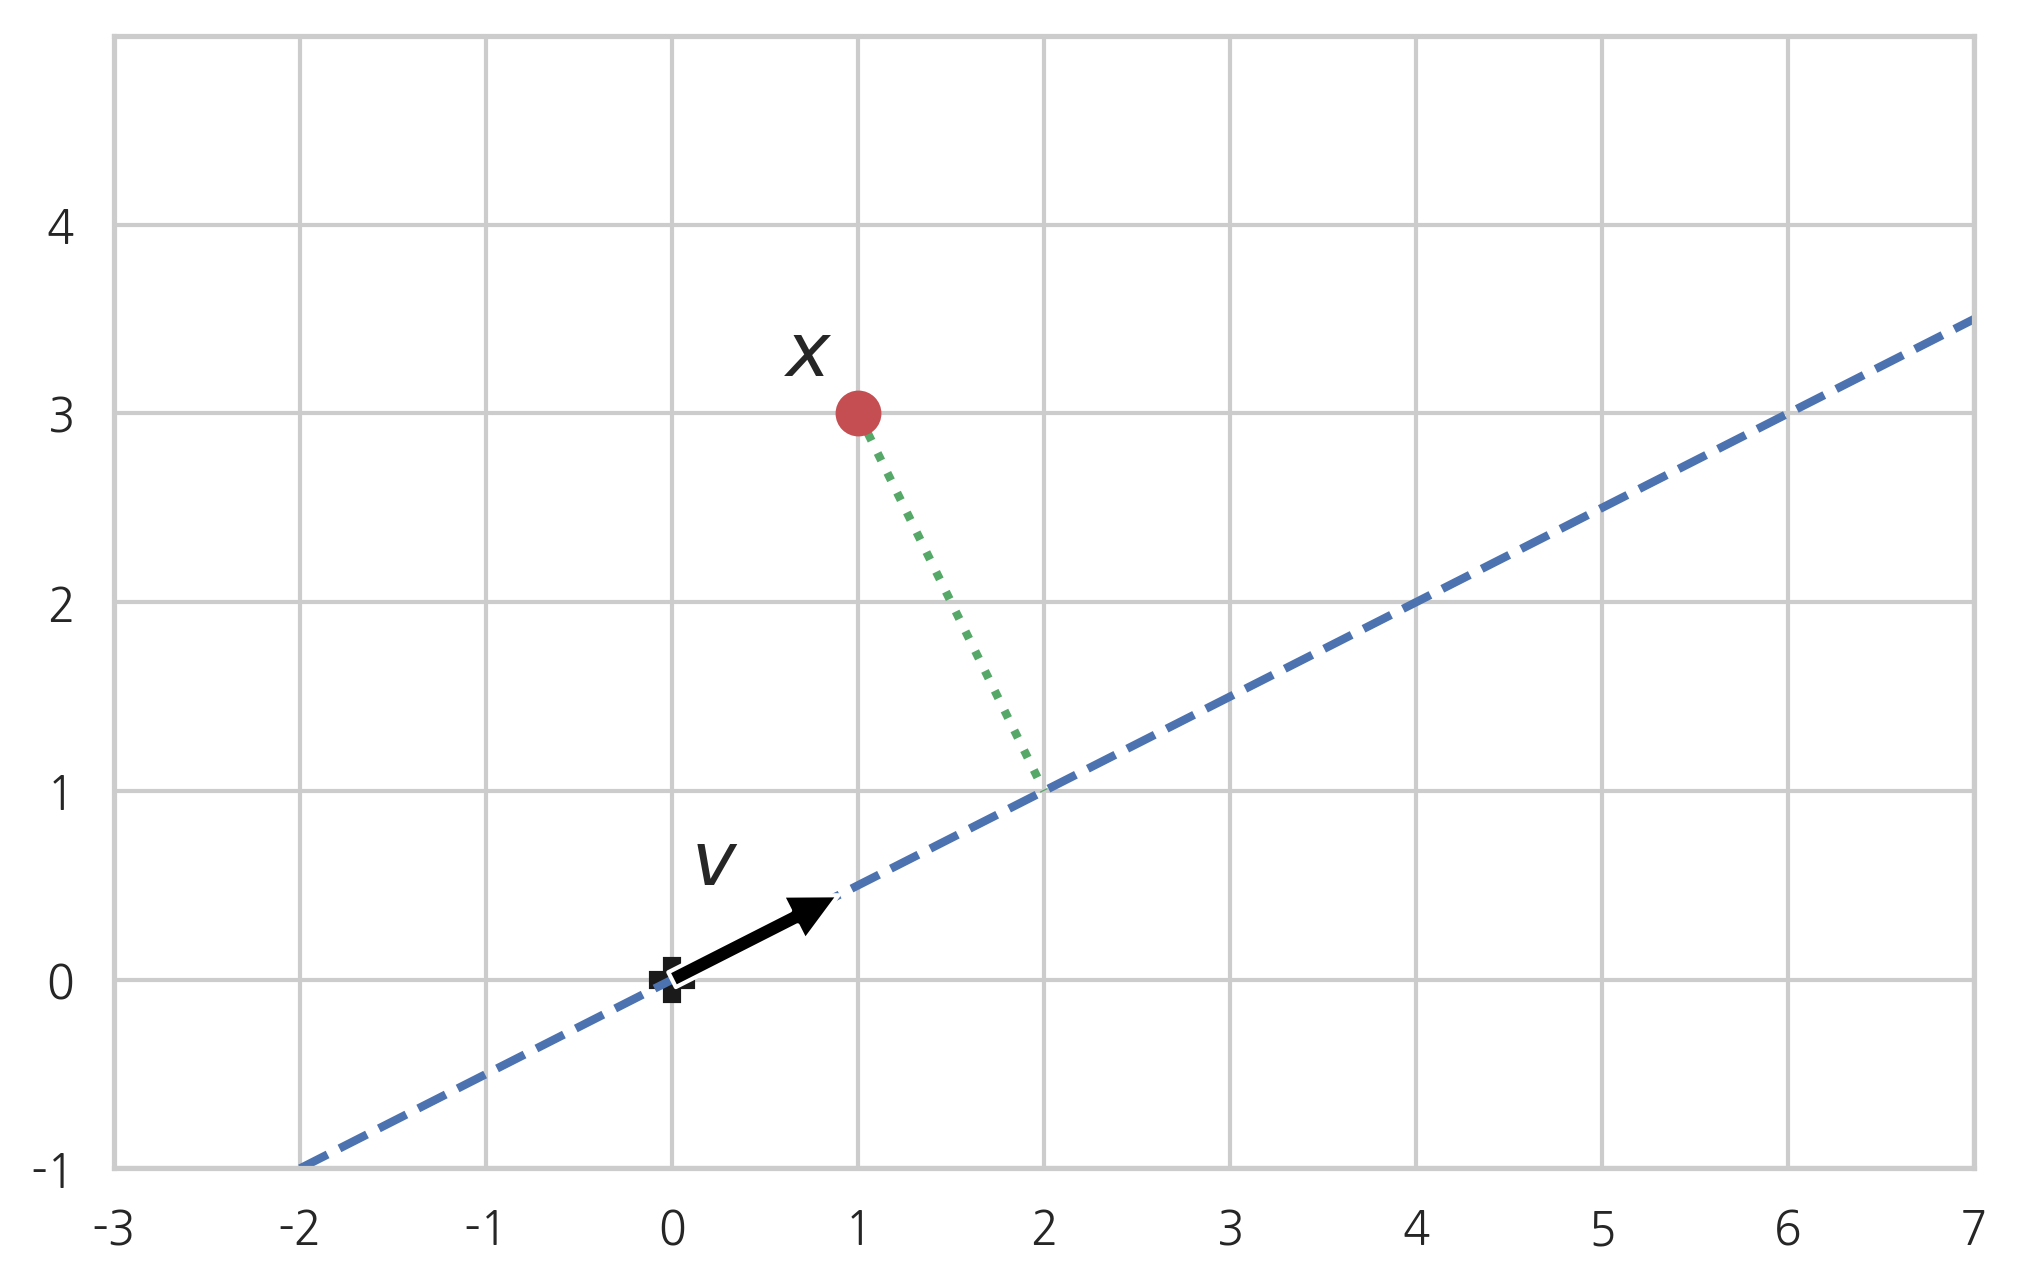

In [16]:
v = np.array([2, 1]) / np.sqrt(5)
x = np.array([1, 3])
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=v, xytext=(0, 0), arrowprops=dict(facecolor='black'))
plt.plot([-2, 8], [-1, 4], 'b--', lw=2)
plt.plot([1, 2], [3, 1], 'g:', lw=2)
plt.plot(x[0], x[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$v$")
plt.text(0.6, 3.2, "$x$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 7)
plt.ylim(-1, 5)
plt.show()

## 직선의 방정식

어떤 벡터 $w$가 있을 때 다음 그림처럼

* 벡터 $w$에 수직이면서
* 벡터 $w$가 가리키는 점을 지나는

직선 $x$의 방정식을 구해보자.

벡터 $x$가 해당 직선의 점이라고 할 때, 위의 두 조건을 만족하려면 벡터 $x$가 가리키는 점과 벡터 $w$가 가리키는 점을 이은 벡터 $x - w$가 벡터 $w$와 직교해야 한다. 따라서 다음 식이 성립한다.

$$
w^T(x - w) = 0 \\
w^T(x - w) = w^Tx - w^Tw = w^Tx - \| w \|^2
$$

$$
 w^Tx - \| w \|^2 = 0
$$

이 직선과 원점 사이의 거리는 벡터 $w$의 놈 $\|w\|$이다.

$$ \text{직선과 원점 사이의 거리} = \|w\|  $$

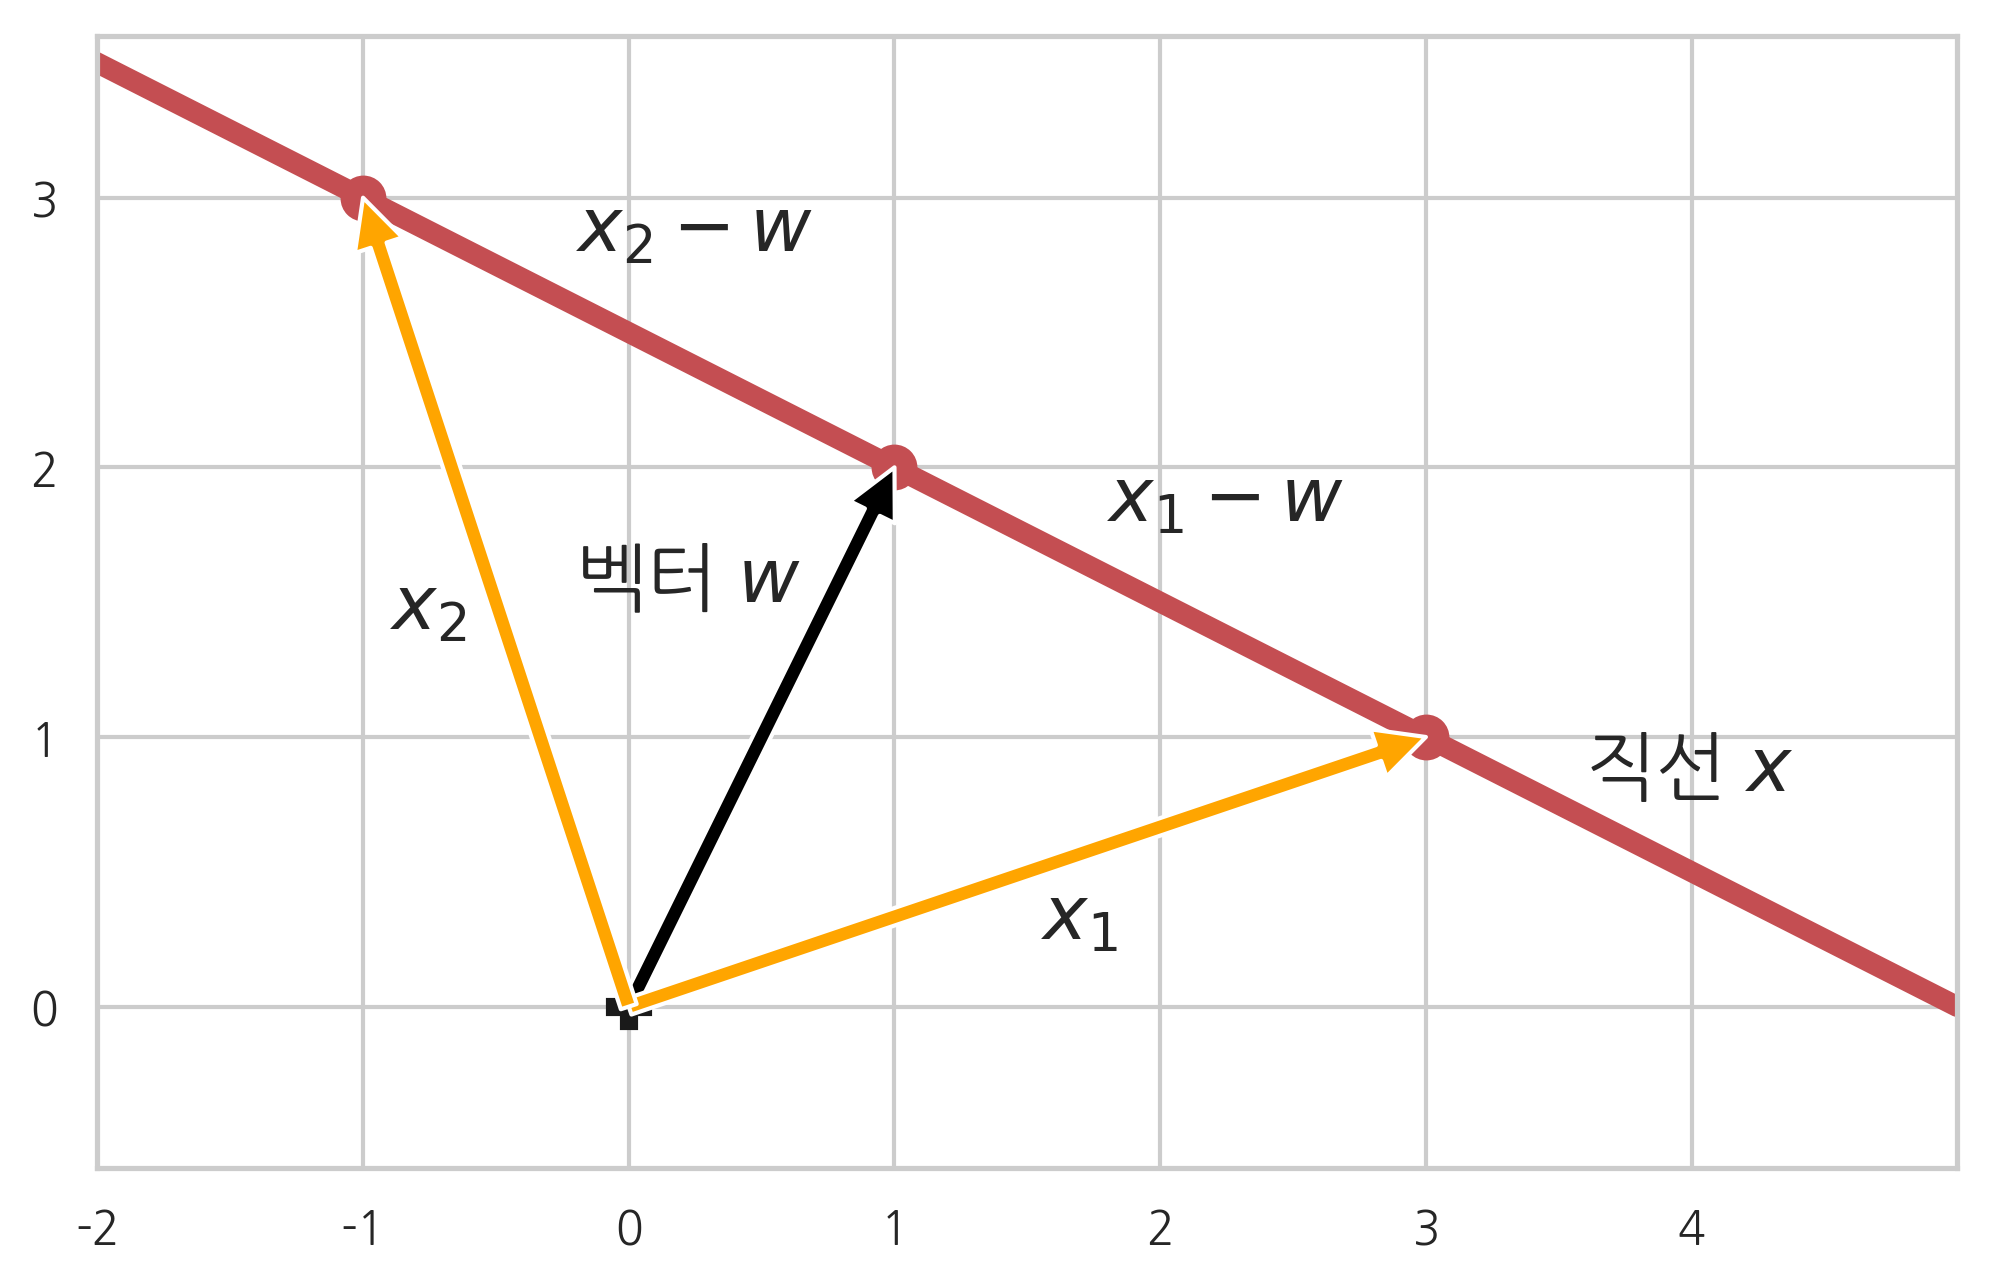

In [17]:
w = np.array([1, 2])
x1 = np.array([3, 1])
x2 = np.array([-1, 3])
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=dict(facecolor='black'))
plt.annotate('', xy=x1, xytext=(0, 0), arrowprops=dict(facecolor='orange'))
plt.annotate('', xy=x2, xytext=(0, 0), arrowprops=dict(facecolor='orange'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(w[0], w[1], 'ro', ms=10)
plt.plot(x1[0], x1[1], 'ro', ms=10)
plt.plot(x2[0], x2[1], 'ro', ms=10)
plt.plot([-3, 5], [4, 0], 'r-', lw=5)
plt.text(-0.2, 1.5, "벡터 $w$")
plt.text(1.55, 0.25, "$x_1$")
plt.text(-0.9, 1.40, "$x_2$")
plt.text(1.8, 1.8, "$x_1 - w$")
plt.text(-0.2, 2.8, "$x_2 - w$")
plt.text(3.6, 0.8, "직선 $x$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 5))
plt.xlim(-2, 5)
plt.ylim(-0.6, 3.6)
plt.show()

예를 들어 

$$
w = \begin{bmatrix}1 \\ 2\end{bmatrix} 
$$

일 때

$$
\| w \|^2 = 5 
$$

$$
\begin{bmatrix}1 & 2\end{bmatrix} \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} - 5 = x_1 + 2x_2 - 5 = 0
$$

$$
x_1 + 2x_2 = 5 
$$

이 방정식은 벡터 $w$가 가리키는 점 $(1, 2)$를 지나면서 벡터 $w$에 수직인 직선을 뜻한다. 이 직선과 원점사이의 거리는 $\|w\|=\sqrt{5}$이다.

이번에는 벡터 $w$가 가리키는 점을 지나야 한다는 조건을 없애고

* 벡터 $w$에 수직인

직선 $x$의 방정식을 구해보자.

이 때는 직선이 $w$가 아니라 $w$와 뱡향이 같고 길이가 다른 벡터 $w'=cw$을 지날 것이다. $c$는 양의 실수이다. 

위에서 했던 방법으로 다시 직선의 방정식을 구하면 다음과 같다.

$$ w'^Tx - \| w' \|^2 =  cw^Tx - c^2 \| w \|^2 = 0  $$

$$ w^Tx - c \| w \|^2 = 0  $$

여기에서 $c \| w \|^2$는 임의의 수가 될 수 있으므로 단순히 벡터 $w$에 수직인 직선의 방정식은 다음과 같이 나타낼 수 있다.

$$ w^Tx - w_0 = 0    $$

이 직선과 원점사이의 거리는 다음과 같다.

$$ \text{직선과 원점 사이의 거리} = c \| w \| = \dfrac{w_0}{\|w\|}  $$

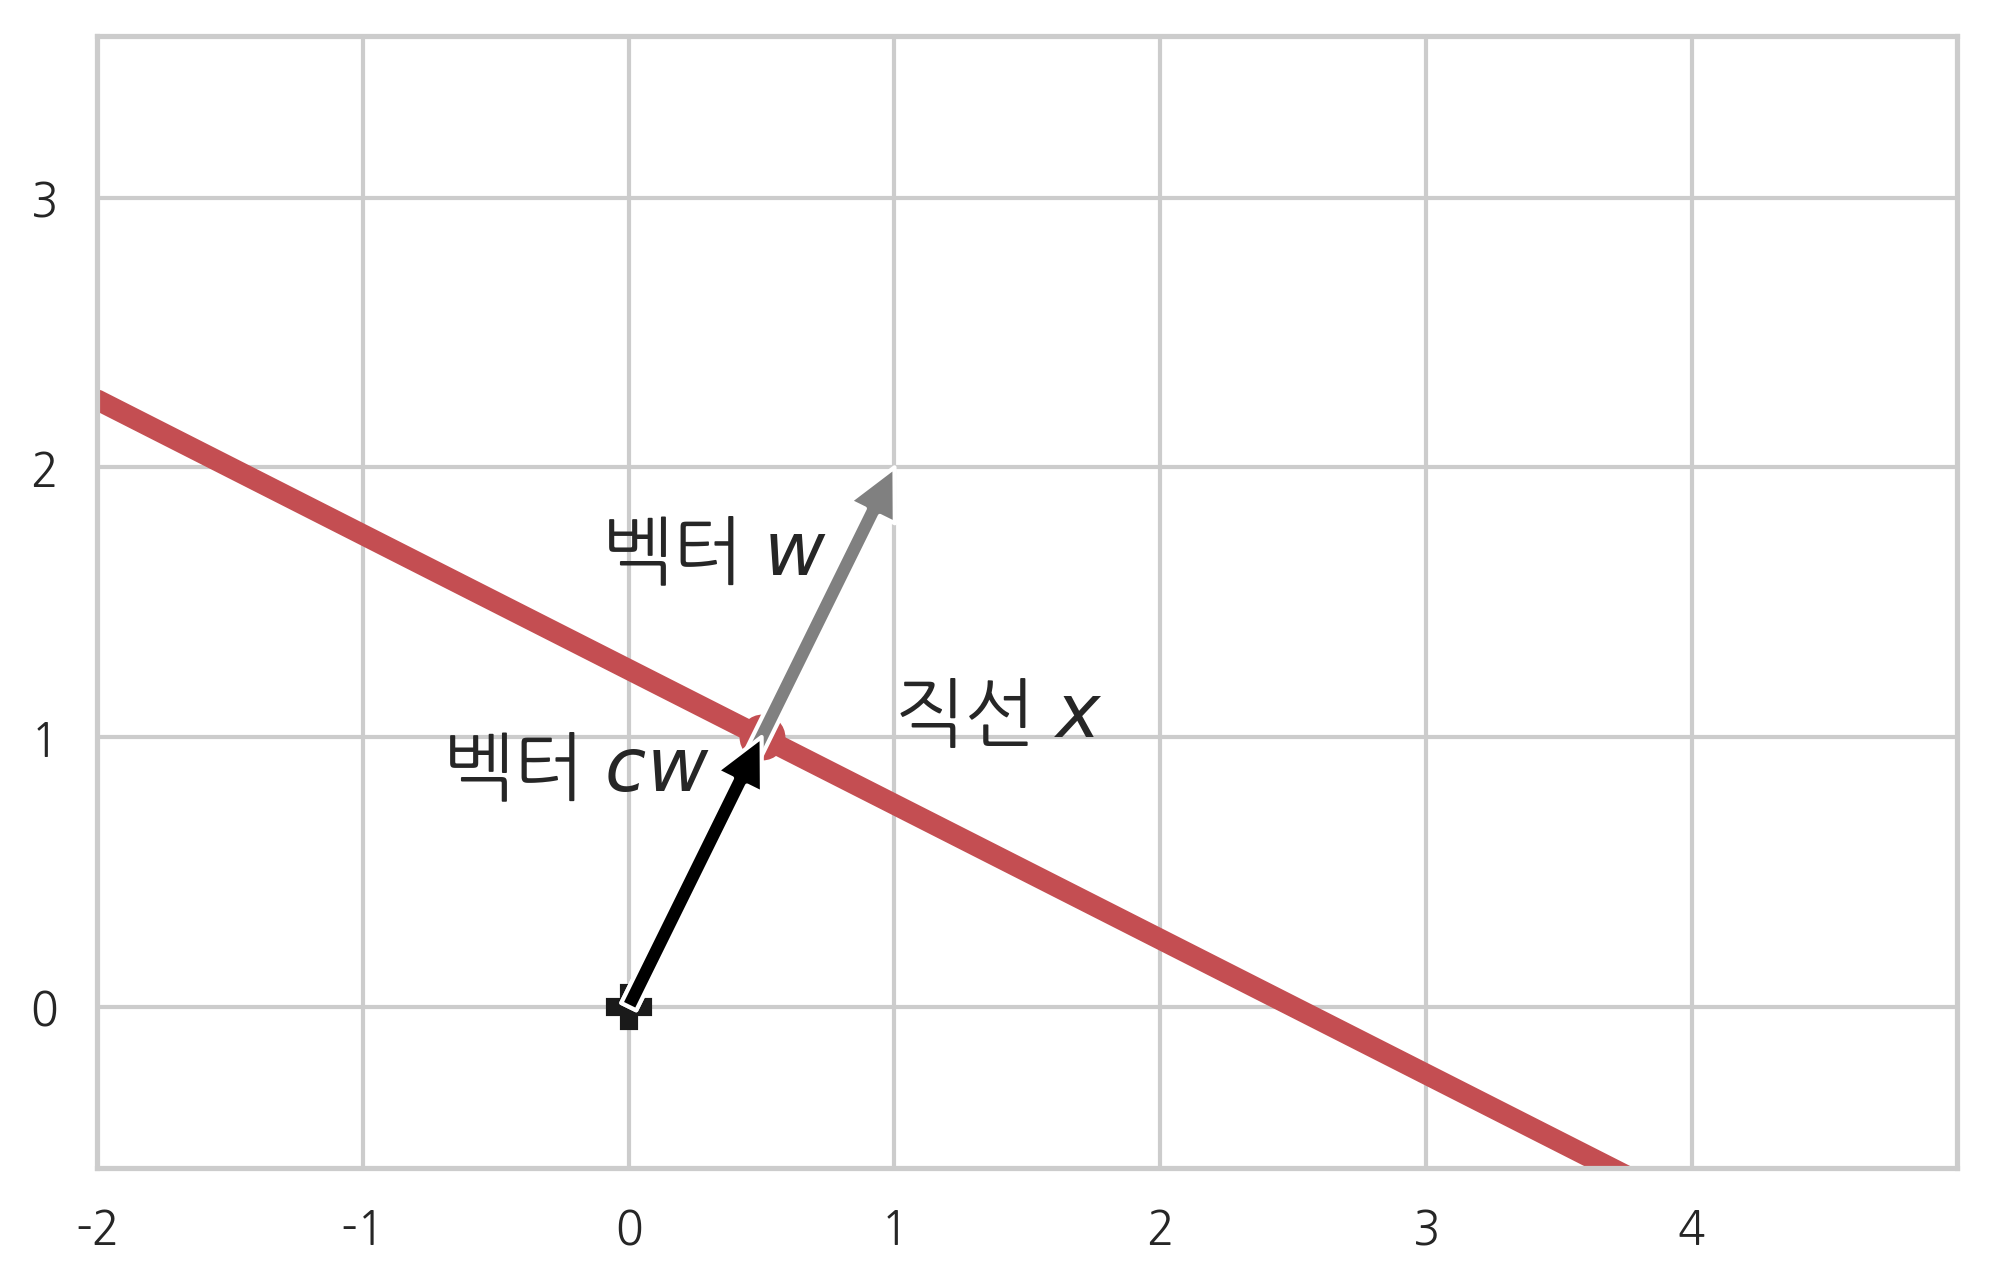

In [18]:
w = np.array([1, 2])
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=0.5 * w, xytext=(0, 0), arrowprops=dict(facecolor='black'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(0.5 * w[0], 0.5 * w[1], 'ro', ms=10)
plt.plot([-2, 5], [2.25, -1.25], 'r-', lw=5)
plt.text(-0.7, 0.8, "벡터 $cw$")
plt.text(-0.1, 1.6, "벡터 $w$")
plt.text(1, 1, "직선 $x$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 5))
plt.xlim(-2, 5)
plt.ylim(-0.6, 3.6)
plt.show()

예를 들어 $c=0.5$이면 벡터 $w=[1, 2]^T$에 수직이고 원점으로부터의 거리가 $\frac{\sqrt{5}}{2}$인 직선이 된다.

$$ x_1 + 2x_2 - 2.5 = 0 $$

#### 연습 문제 5.3.10

직선 $w^Tx - w_0 = 0$과 원점 사이의 거리가 다음과 같다는 것을 증명하라.

$$ \text{직선과 원점 사이의 거리} = \dfrac{w_0}{\|w\|}  $$

## 직선과 점의 거리

이번에는 직선 $w^Tx - \|w\|^2 = 0$ 과 이 직선 위에 있지 않은 점 $x'$ 사이의 거리를 구해보자.

벡터 $w$에 대한 벡터 $x'$의 프로젝션 $x'^{\Vert w}$의 길이는 다음과 같다.

$$
\|x'^{\Vert w}\| = \dfrac{w^Tx'}{\|w\|} 
$$

직선과 점 $x'$ 사이의 거리는 이 길이에서 원점에서 직선까지의 거리 $\|w\|$를 뺀 값의 절대값이다. 

$$
\left|  \|x'^{\Vert w}\| - \|w\| \right| = 
\left| \dfrac{w^Tx'}{\|w\|} - \|w\| \right| =
\dfrac{\left|w^Tx' - \|w\|^2 \right|}{\|w\|}
$$

직선의 방정식이 $w^Tx - w_0 = 0$이면 직선과 점의 거리는 다음과 같다.

$$
\dfrac{\left|w^Tx' - w_0 \right|}{\|w\|}
$$

이 공식은 나중에 분류 방법의 하나인 **서포트 벡터 머신(SVM: Support Vector Machine)**에서 사용된다.

#### 연습 문제 5.3.11

직선의 방정식이 $w^Tx - w_0 = 0$이면 직선과 점의 거리는 다음과 같다는 것을 증명하라.

$$
\dfrac{\left|w^Tx' - w_0 \right|}{\|w\|}
$$

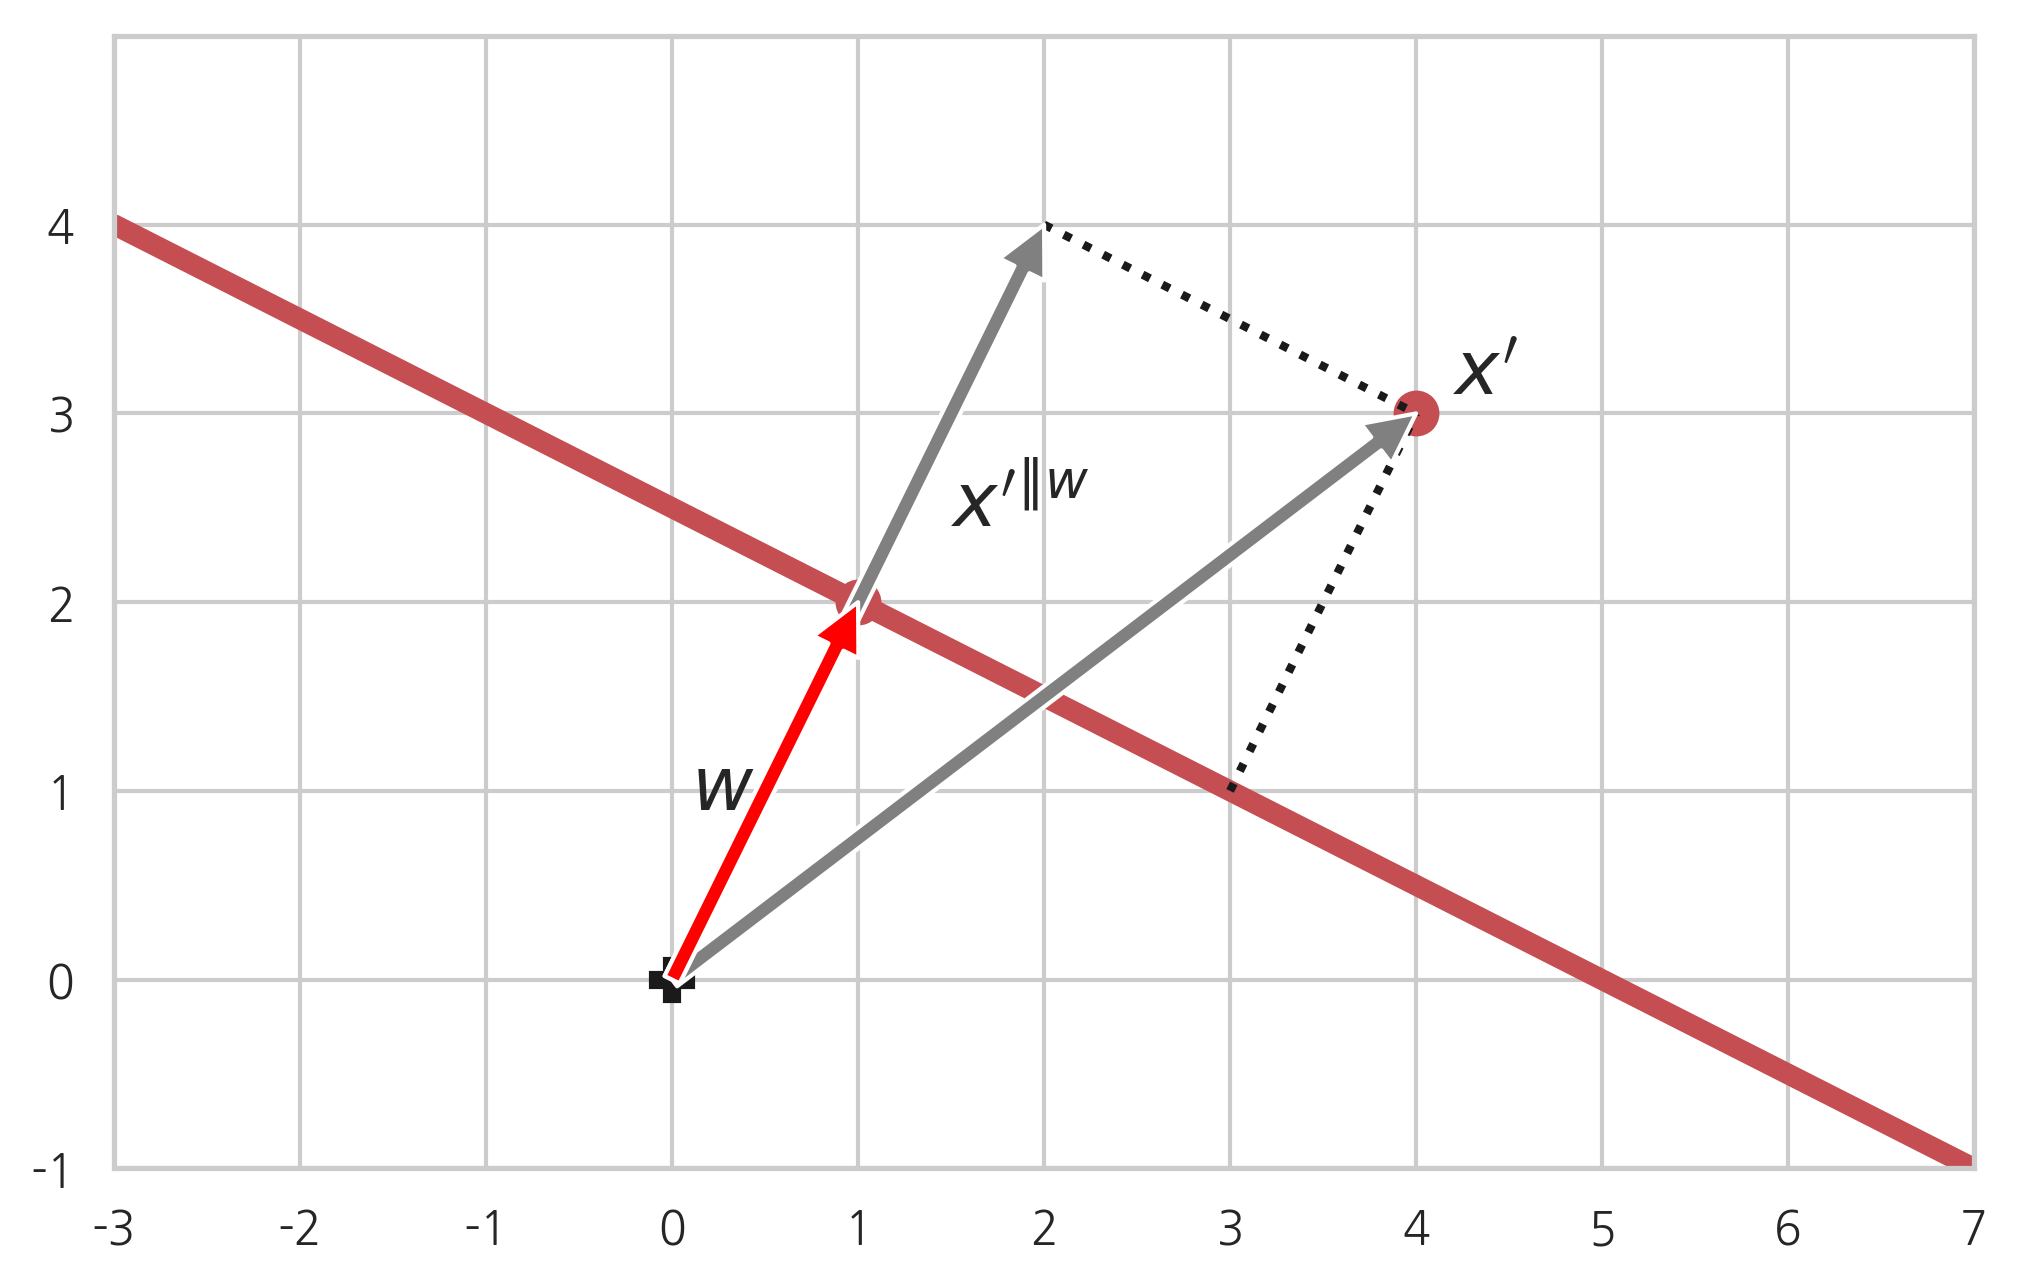

In [19]:
w = np.array([1, 2])
x1 = np.array([4, 3])
x2 = np.array([1, 2]) * 2
plt.annotate('', xy=x1, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=x2, xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=dict(facecolor='red'))
plt.plot(0, 0, 'kP', ms=10)
plt.plot(w[0], w[1], 'ro', ms=10)
plt.plot(x1[0], x1[1], 'ro', ms=10)
plt.plot([-3, 7], [4, -1], 'r-', lw=5)
plt.plot([2, 4], [4, 3], 'k:', lw=2)
plt.plot([3, 4], [1, 3], 'k:', lw=2)
plt.text(0.1, 0.9, "$w$")
plt.text(4.2, 3.1, "$x'$")
plt.text(1.5, 2.4, "$x'^{\Vert w}$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 7)
plt.ylim(-1, 5)
plt.show()